**Health care disease**

**Kawtar Dakham**

**Doha Chaik**

**Importation des bibliothéques et lecture de la base de données**

In [138]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import MissingIndicator, KNNImputer,SimpleImputer
from sklearn.impute import IterativeImputer
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
import scipy.stats as stats


df = pd.read_csv('framingham.csv')

**Affichage de la dataframe**

In [139]:
df.head()

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

**On va commencer par le pre-processing de notre dataset**

In [140]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

**On remarque que notre dataset contient 15 variables explicatives et on a 4238 observations,on remarque que tous les variables sont numériques (int et float),donc on aura pas besoin de faire de l'encodage,ainsi on a la variable cible Tean Year CHD est une variable binaire qu prend deux valeurs 0 et 1.**

**Pour les variables explicatives quantitatifs sont:['age', 'cigsPerDay, 'BMI','totalchol', 'sysBP','diaBP','heartRate', 'glucose']**

**Pour les variables explicatives qualitatifs on a:['male', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes','education']**

**On remarque qu'il y'a des valeurs manquantes pour les variables suivantes:**

**education,cigsPerDay, BPMeds,heartRate,glucose**


On va commencer notre traitement des données par l'identification et le traitement des valeurs abberantes

**Identification des valeurs abberantes**

On va faire un boxplot pour l'ensemble des variables continues pour savoir s'il y'a des valeurs aberrantes 

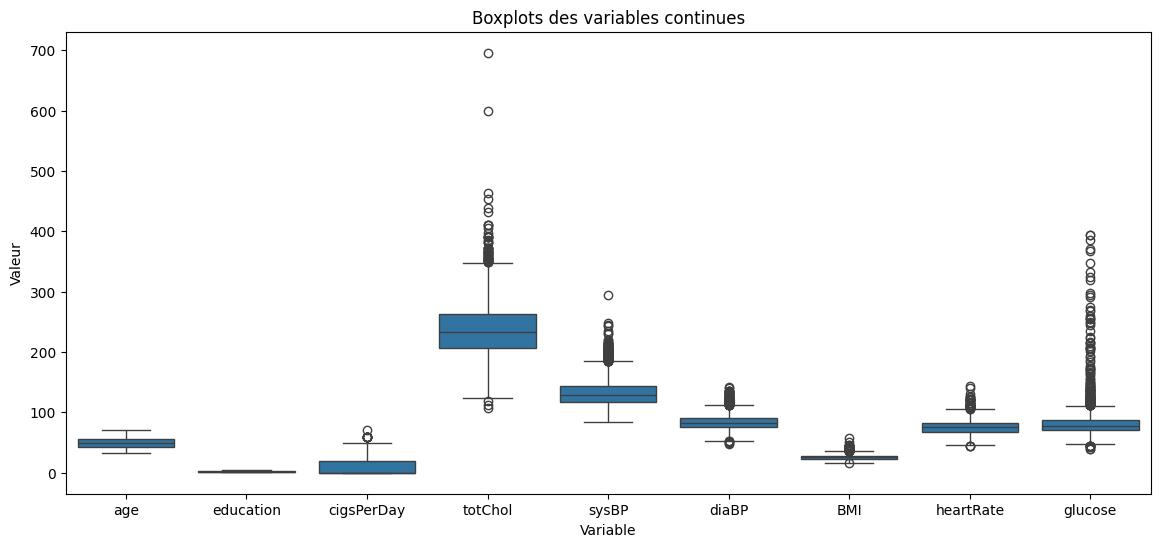

In [141]:
columns =['age', 'education', 'cigsPerDay', 'totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']
df_melted = df[columns].melt(var_name='Variable', value_name='Valeur')
# Création des boxplots pour toutes les variables continues
plt.figure(figsize=(14, 6)) 
sns.boxplot(data=df_melted, x='Variable', y='Valeur')
plt.title("Boxplots des variables continues")
plt.show()

On observe d'aprés les Boxplots la distribution de chaque variable contunie ,on remarque l'existence des valeurs aberrantes pour l'ensemble des variables sauf **age et education**,mais on va traiter chaque variable pour détecter les outliers et les remplacer par des NAN valeurs afin de les remplacer aprés lors du traitement des valeurs manquantes.

**Pour la variable education**

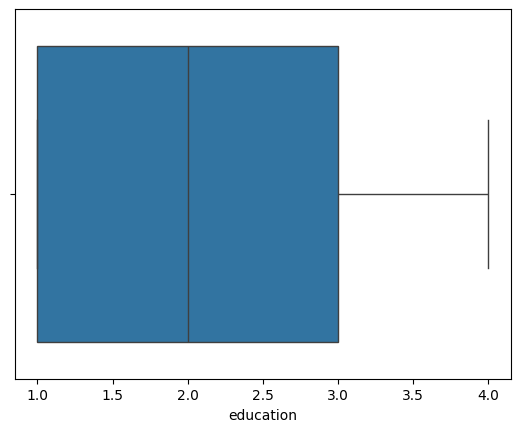

In [142]:
sns.boxplot(data=df, x='education')
plt.show()

**La variable education ne contient aucune valeur aberrante**

**La variable age**

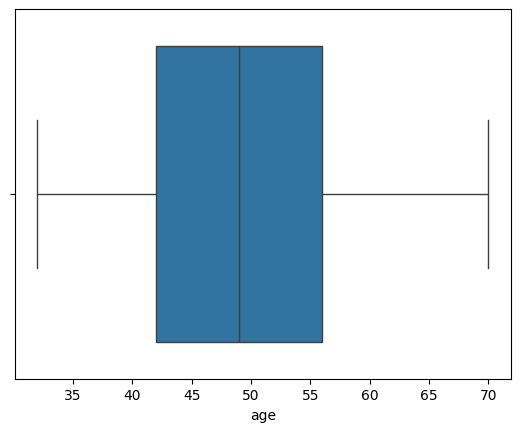

In [143]:
sns.boxplot(data=df, x='age')
plt.show()

**La variable age ne contient aucune valeur aberrante**

**La variable cigsPerday**

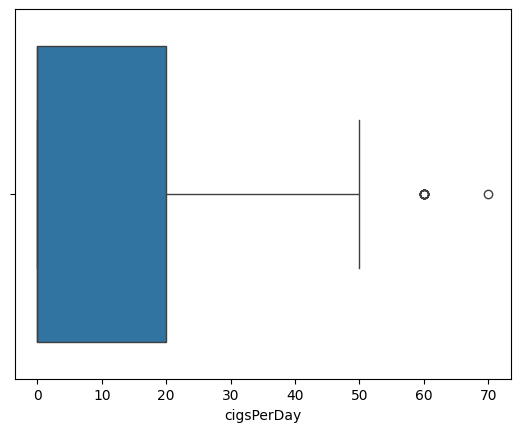

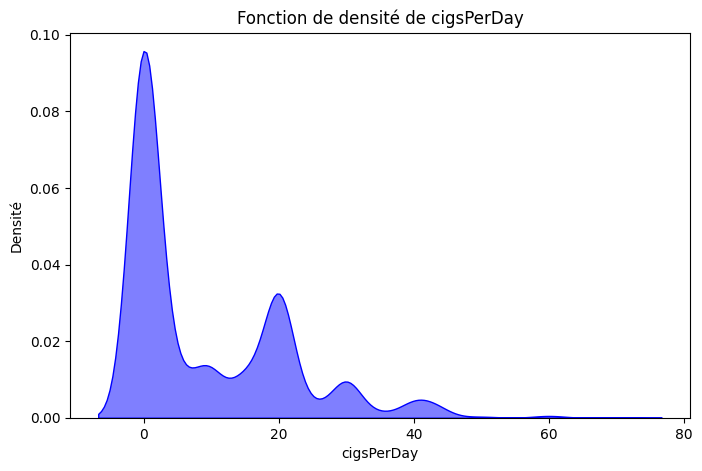

In [144]:
sns.boxplot(data=df, x='cigsPerDay')
variable ='cigsPerDay' 
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x=variable, fill=True, color='blue', alpha=0.5)
plt.title(f"Fonction de densité de {variable}")
plt.xlabel(variable)
plt.ylabel("Densité")
plt.show()


**Il faut se débarasser des outliers pour cette variable**

In [145]:
# Identification des données aberrantes - IQR
# Fonction pour détecter les outliers en utilisant l'IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

In [146]:
# Trouver les outliers '
outliers = detect_outliers_iqr(df,'cigsPerDay')
# Afficher les outliers
print("Outliers détectés:")
print(outliers)
print(len(outliers))

Outliers détectés:
      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
327      1   56        1.0              1        60.0     0.0   
721      1   59        1.0              1        60.0     0.0   
1054     1   58        2.0              1        60.0     0.0   
1452     1   39        1.0              1        60.0     0.0   
1468     1   50        1.0              1        60.0     0.0   
1488     1   37        4.0              1        60.0     0.0   
1849     1   48        1.0              1        60.0     0.0   
2709     1   46        1.0              1        60.0     0.0   
2710     1   49        2.0              1        60.0     0.0   
3008     1   40        3.0              1        70.0     0.0   
3673     1   48        NaN              1        60.0     0.0   
3928     1   67        2.0              1        60.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
327                 0             0         0    246.0  

**On remarque que cette variable contient 12 valeurs aberrntes egale a 60,70 cigarettes per day qui peut etre due a une faute de frappe donc on va essayer de remplacer ces valeurs pour la moyenne au lieu de les supprimer**

In [147]:
def replace_outliers_with_mean(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Calcul de la moyenne de la colonne (sans tenir compte des NaN)
    column_mean = data[column].mean()
    
    # Remplacement des valeurs aberrantes
    data[column] = data[column].apply(lambda x: column_mean if (x < lower_bound or x > upper_bound) else x)
    return data

In [148]:
df = replace_outliers_with_mean(df, 'cigsPerDay')
# Vérification
print("Colonnes après traitement des outliers :")
print(df['cigsPerDay'].describe())

Colonnes après traitement des outliers :
count    4209.000000
mean        8.855319
std        11.592422
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        50.000000
Name: cigsPerDay, dtype: float64


**Affichage de la distribution de CigsPerday aprés changement des des valeurs aberrantes**

<Axes: xlabel='cigsPerDay'>

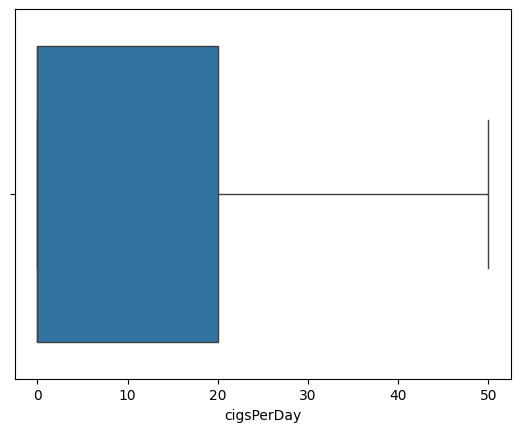

In [149]:
sns.boxplot(data=df, x='cigsPerDay')

**Maintenat on a pas de valeurs abberantes pour CIgsPerDay**

**La variable totchol**

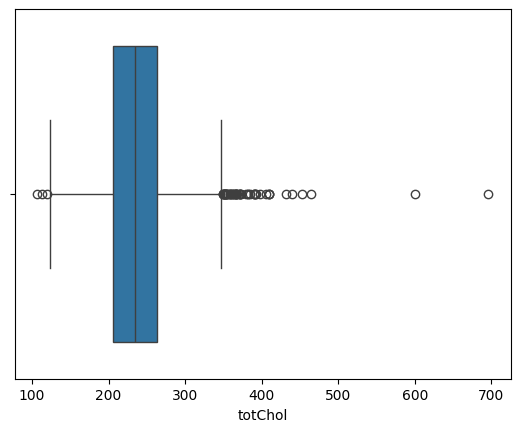

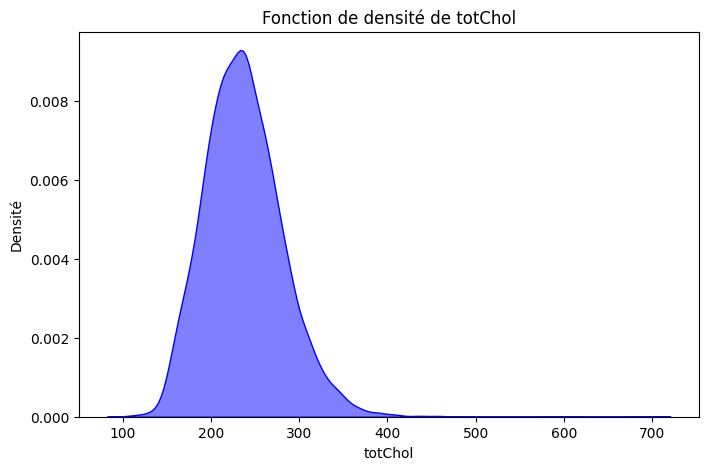

In [150]:
sns.boxplot(data=df, x='totChol')
variable ='totChol' 
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x=variable, fill=True, color='blue', alpha=0.5)
plt.title(f"Fonction de densité de {variable}")
plt.xlabel(variable)
plt.ylabel("Densité")
plt.show()

In [151]:
# Trouver les outliers 
outliers = detect_outliers_iqr(df,'totChol')
# Afficher les outliers
print("Outliers détectés:")
print(outliers['totChol'])
print(len(outliers))

Outliers détectés:
194     464.0
259     352.0
333     368.0
533     370.0
543     439.0
617     398.0
670     355.0
920     353.0
926     360.0
998     372.0
1103    352.0
1111    600.0
1150    392.0
1389    358.0
1447    391.0
1544    410.0
1610    356.0
1624    107.0
1691    372.0
1710    366.0
1870    365.0
1932    362.0
1937    410.0
2014    351.0
2024    390.0
2206    405.0
2208    359.0
2275    350.0
2349    380.0
2363    355.0
2368    390.0
2488    371.0
2525    113.0
2575    350.0
2602    354.0
2607    382.0
2671    364.0
2797    367.0
2972    352.0
2985    432.0
3056    351.0
3160    696.0
3165    363.0
3394    382.0
3418    361.0
3474    453.0
3532    352.0
3571    366.0
3806    410.0
3810    350.0
3816    391.0
3844    358.0
3916    373.0
4001    385.0
4003    366.0
4066    119.0
Name: totChol, dtype: float64
56


**On remarque qu'il y'a 56 valeurs abberantes pour tot chol**

**On va les remplacer par Nan**

In [152]:
def replace_outliers_with_Nan(data, column):
    # Calcul des quartiles et des bornes
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
     
    # Remplacement des valeurs aberrantes
    data[column] = data[column].apply(lambda x: np.nan if (x < lower_bound or x > upper_bound) else x)
    return data

In [153]:
df = replace_outliers_with_Nan(df,'totChol')
# Vérification
print("Colonnes après traitement des outliers :")
print(df['totChol'].describe())

Colonnes après traitement des outliers :
count    4132.000000
mean      234.892788
std        40.854743
min       124.000000
25%       205.000000
50%       233.000000
75%       262.000000
max       347.000000
Name: totChol, dtype: float64


**Vérification aprés qu'on a remplacé par NAN**

<Axes: xlabel='totChol'>

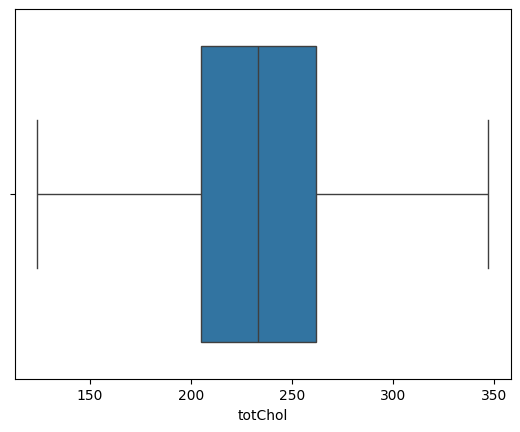

In [154]:
sns.boxplot(data=df, x='totChol')

**La variable SysBP**

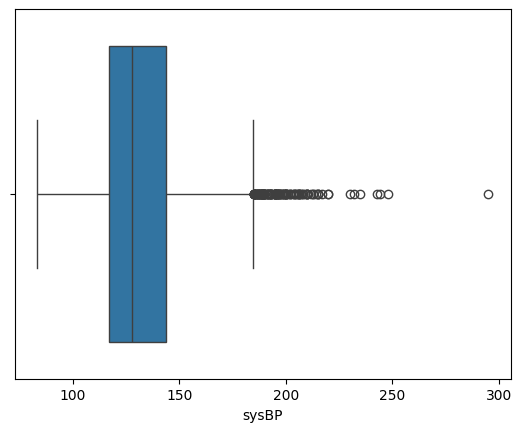

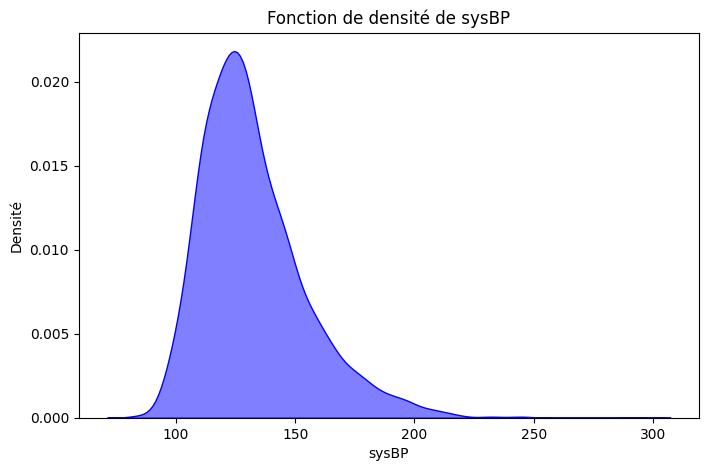

In [155]:
sns.boxplot(data=df, x='sysBP')
variable ='sysBP' 
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x=variable, fill=True, color='blue', alpha=0.5)
plt.title(f"Fonction de densité de {variable}")
plt.xlabel(variable)
plt.ylabel("Densité")
plt.show()

In [156]:
# Trouver les outliers 
outliers = detect_outliers_iqr(df,'sysBP')
# Afficher les outliers
print("Outliers détectés:")
#print(outliers)
print(outliers['sysBP'])
print(len(outliers))

Outliers détectés:
44      206.0
66      190.0
87      200.0
108     187.0
153     212.0
        ...  
4123    206.0
4173    210.0
4193    195.0
4222    188.0
4228    190.0
Name: sysBP, Length: 126, dtype: float64
126


On a 126 valeurs aberrantes

In [157]:
df = replace_outliers_with_Nan(df,'sysBP')
# Vérification
print("Colonnes après traitement des outliers :")
print(df['sysBP'].describe())

Colonnes après traitement des outliers :
count    4112.000000
mean      130.301921
std        18.762226
min        83.500000
25%       116.000000
50%       127.500000
75%       142.000000
max       184.500000
Name: sysBP, dtype: float64


<Axes: xlabel='sysBP'>

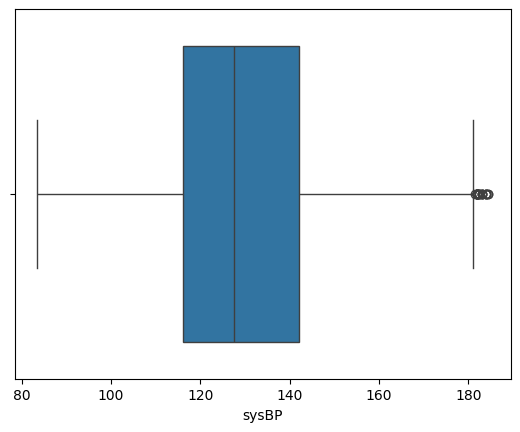

In [158]:
sns.boxplot(data=df, x='sysBP')

**diaBP**

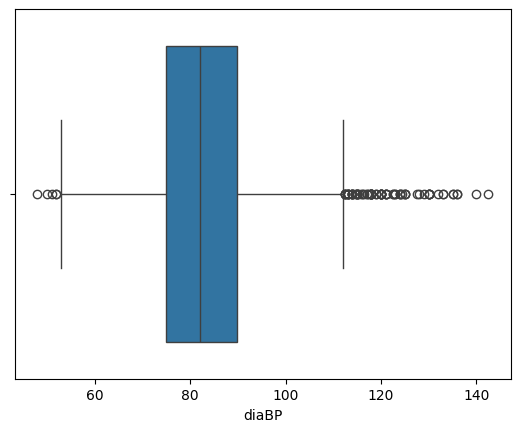

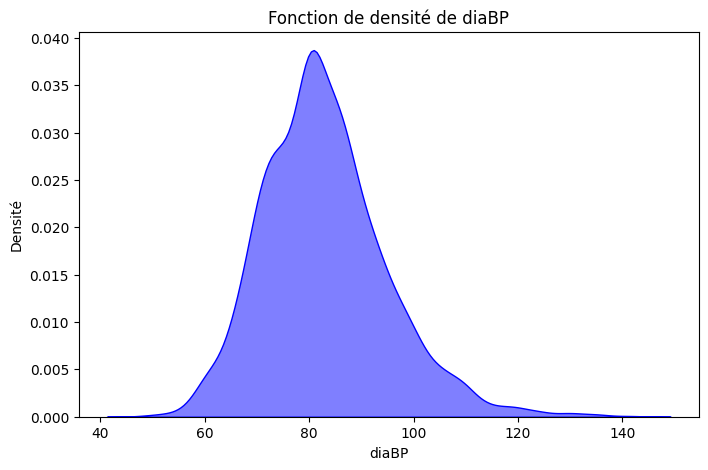

In [159]:
a='diaBP'
sns.boxplot(data=df, x=a)
variable =a
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x=variable, fill=True, color='blue', alpha=0.5)
plt.title(f"Fonction de densité de {variable}")
plt.xlabel(variable)
plt.ylabel("Densité")
plt.show()


Colonnes après traitement des outliers :
count    4157.000000
mean       82.230936
std        10.726243
min        53.000000
25%        74.500000
50%        82.000000
75%        89.000000
max       112.000000
Name: diaBP, dtype: float64


<Axes: xlabel='diaBP'>

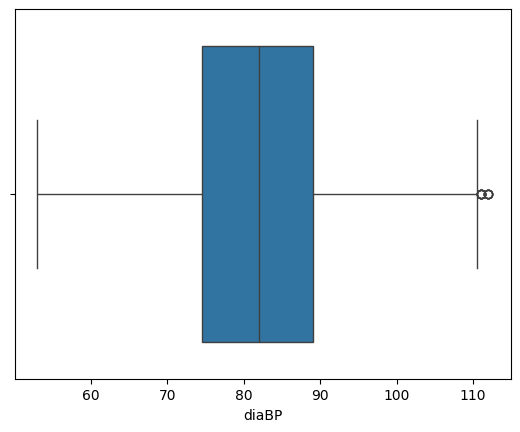

In [160]:
outliers = detect_outliers_iqr(df,a)
df = replace_outliers_with_Nan(df,a)
# Vérification
print("Colonnes après traitement des outliers :")
print(df[a].describe())
sns.boxplot(data=df, x=a)

**BMI**

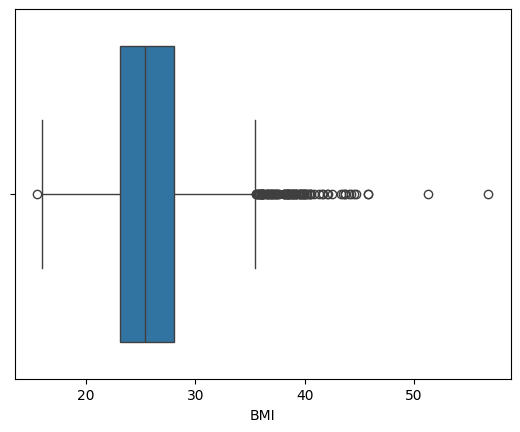

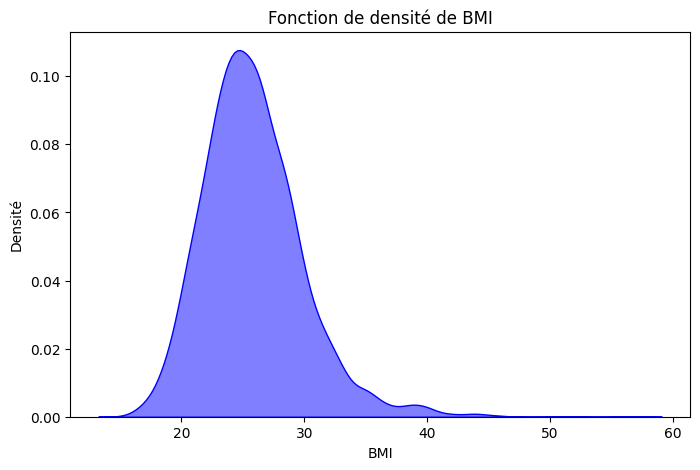

In [161]:
a='BMI'
sns.boxplot(data=df, x=a)
variable =a
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x=variable, fill=True, color='blue', alpha=0.5)
plt.title(f"Fonction de densité de {variable}")
plt.xlabel(variable)
plt.ylabel("Densité")
plt.show()

In [162]:
outliers = detect_outliers_iqr(df,a)
# Afficher les outliers
print("Outliers détectés:")
#print(outliers)
print(outliers[a])
print(len(outliers))

df = replace_outliers_with_Nan(df,a)

Outliers détectés:
35      38.53
37      40.11
78      45.80
87      38.46
108     40.52
        ...  
4001    41.66
4132    38.17
4190    36.07
4215    39.17
4228    43.67
Name: BMI, Length: 97, dtype: float64
97


Colonnes après traitement des outliers :
count    4122.000000
mean       25.492086
std         3.530546
min        15.960000
25%        23.030000
50%        25.290000
75%        27.860000
max        35.450000
Name: BMI, dtype: float64


<Axes: xlabel='BMI'>

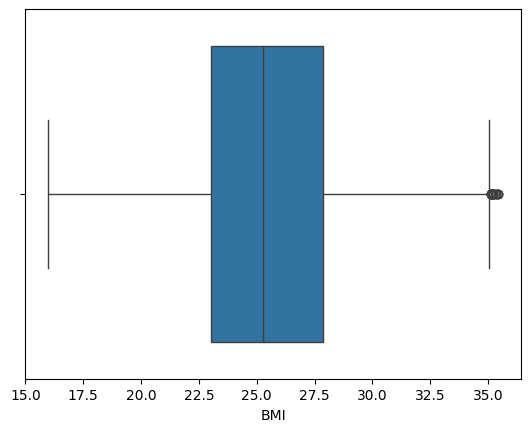

In [163]:
# Vérification
print("Colonnes après traitement des outliers :")
print(df[a].describe())
sns.boxplot(data=df, x=a)

**HeartRate**

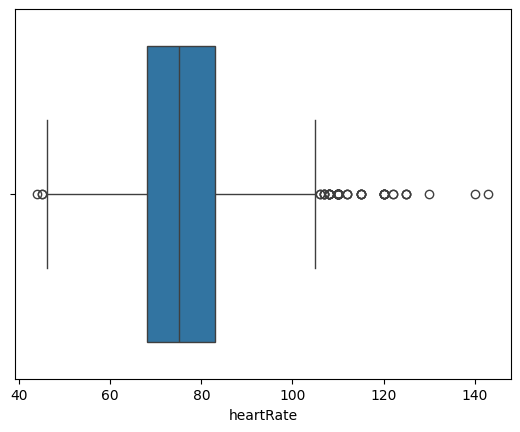

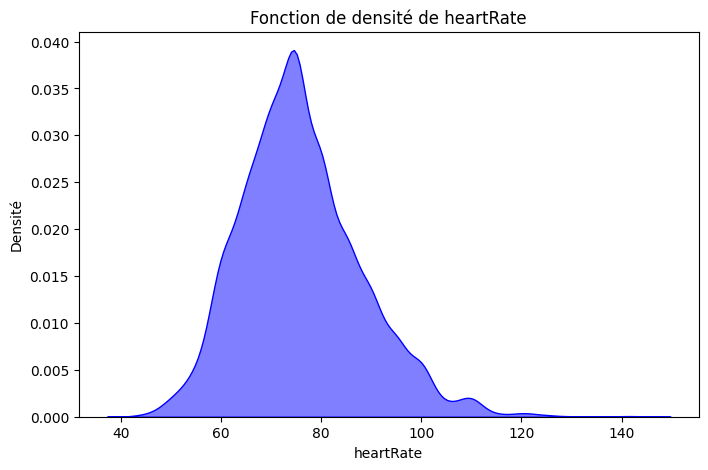

In [164]:
a='heartRate'
sns.boxplot(data=df, x=a)
variable =a
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x=variable, fill=True, color='blue', alpha=0.5)
plt.title(f"Fonction de densité de {variable}")
plt.xlabel(variable)
plt.ylabel("Densité")
plt.show()

In [165]:
outliers = detect_outliers_iqr(df,a)
# Afficher les outliers
print("Outliers détectés:")

print(outliers[a])
print(len(outliers))
df = replace_outliers_with_Nan(df,a)

Outliers détectés:
162     110.0
270     110.0
339     140.0
358     130.0
382     108.0
        ...  
3957    110.0
3964    110.0
4053    125.0
4070    125.0
4164    112.0
Name: heartRate, Length: 76, dtype: float64
76


Colonnes après traitement des outliers :
count    4161.000000
mean       75.250661
std        11.007401
min        46.000000
25%        68.000000
50%        75.000000
75%        82.000000
max       105.000000
Name: heartRate, dtype: float64


<Axes: xlabel='heartRate'>

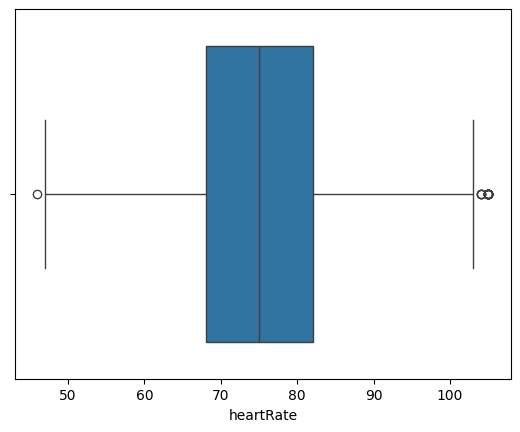

In [166]:
# Vérification
print("Colonnes après traitement des outliers :")
print(df[a].describe())
sns.boxplot(data=df, x=a)

**Glucose**

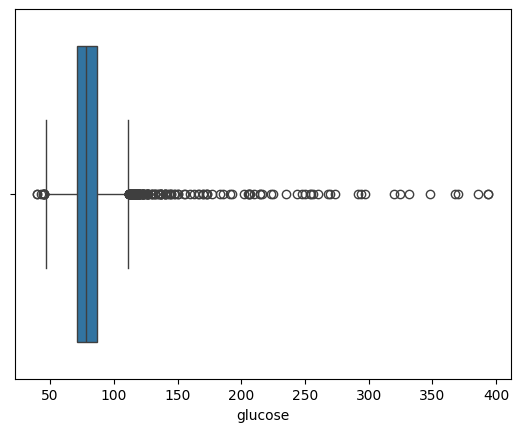

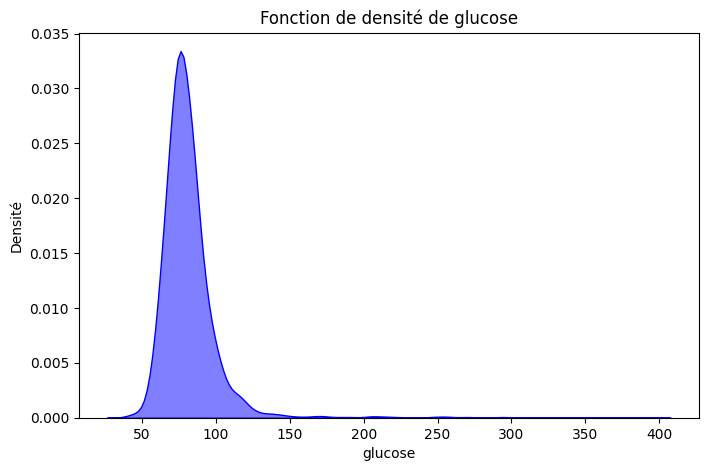

In [167]:
a='glucose'

sns.boxplot(data=df, x=a)
variable =a
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x=variable, fill=True, color='blue', alpha=0.5)
plt.title(f"Fonction de densité de {variable}")
plt.xlabel(variable)
plt.ylabel("Densité")
plt.show()

In [168]:
# Trouver les outliers 
outliers = detect_outliers_iqr(df,a)
# Afficher les outliers
print("Outliers détectés:")
#print(outliers)
print(outliers[a])
print(len(outliers))


df = replace_outliers_with_Nan(df,a)

Outliers détectés:
22      113.0
37      225.0
44      215.0
65       45.0
66      202.0
        ...  
4115    118.0
4118    113.0
4203    120.0
4209    116.0
4228    260.0
Name: glucose, Length: 188, dtype: float64
188


Colonnes après traitement des outliers :
count    3662.000000
mean       78.489896
std        11.019651
min        47.000000
25%        71.000000
50%        77.000000
75%        85.000000
max       111.000000
Name: glucose, dtype: float64


<Axes: xlabel='glucose'>

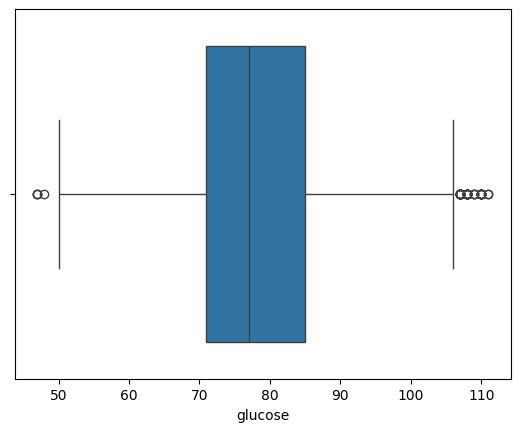

In [169]:
#Vérification
print("Colonnes après traitement des outliers :")
print(df[a].describe())
sns.boxplot(data=df, x=a)

**Missing values treatement**

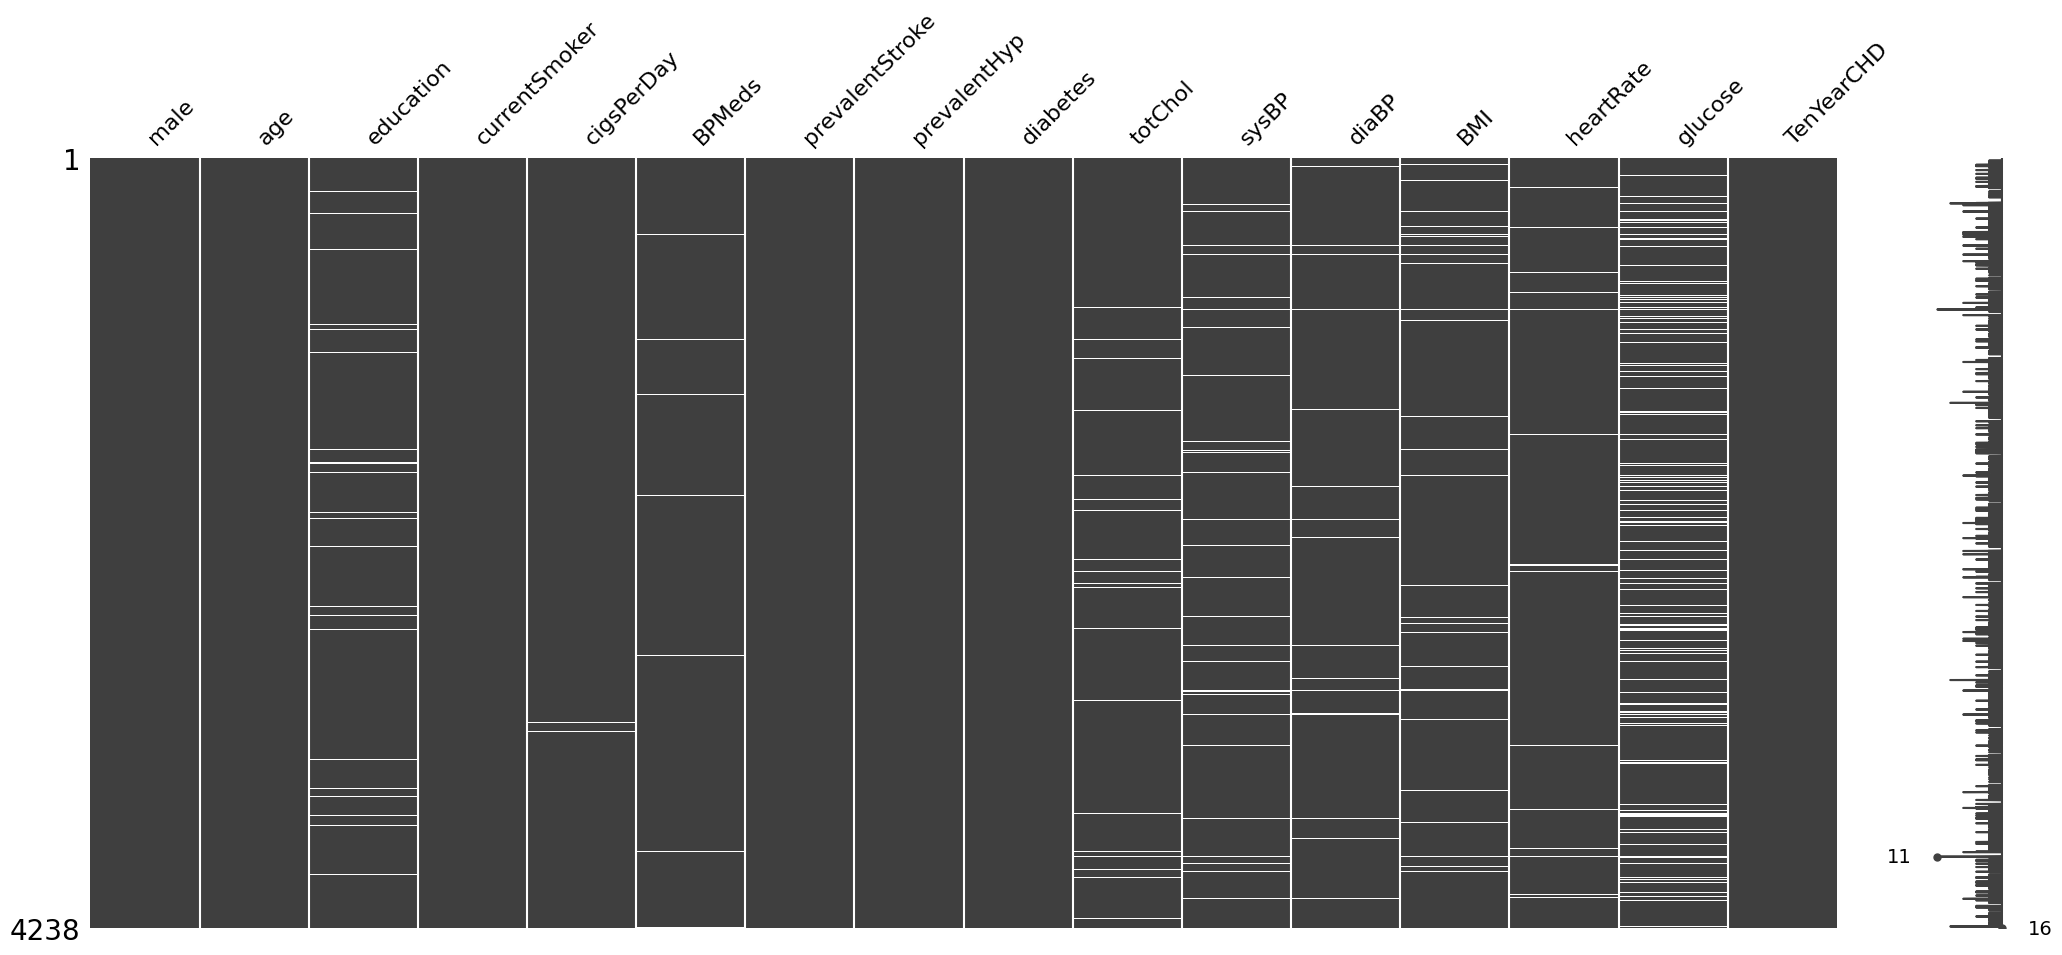

In [170]:
msno.matrix(df)
plt.show()

**Calcul du pourcentage des valeurs manquantes pour chaque variable**

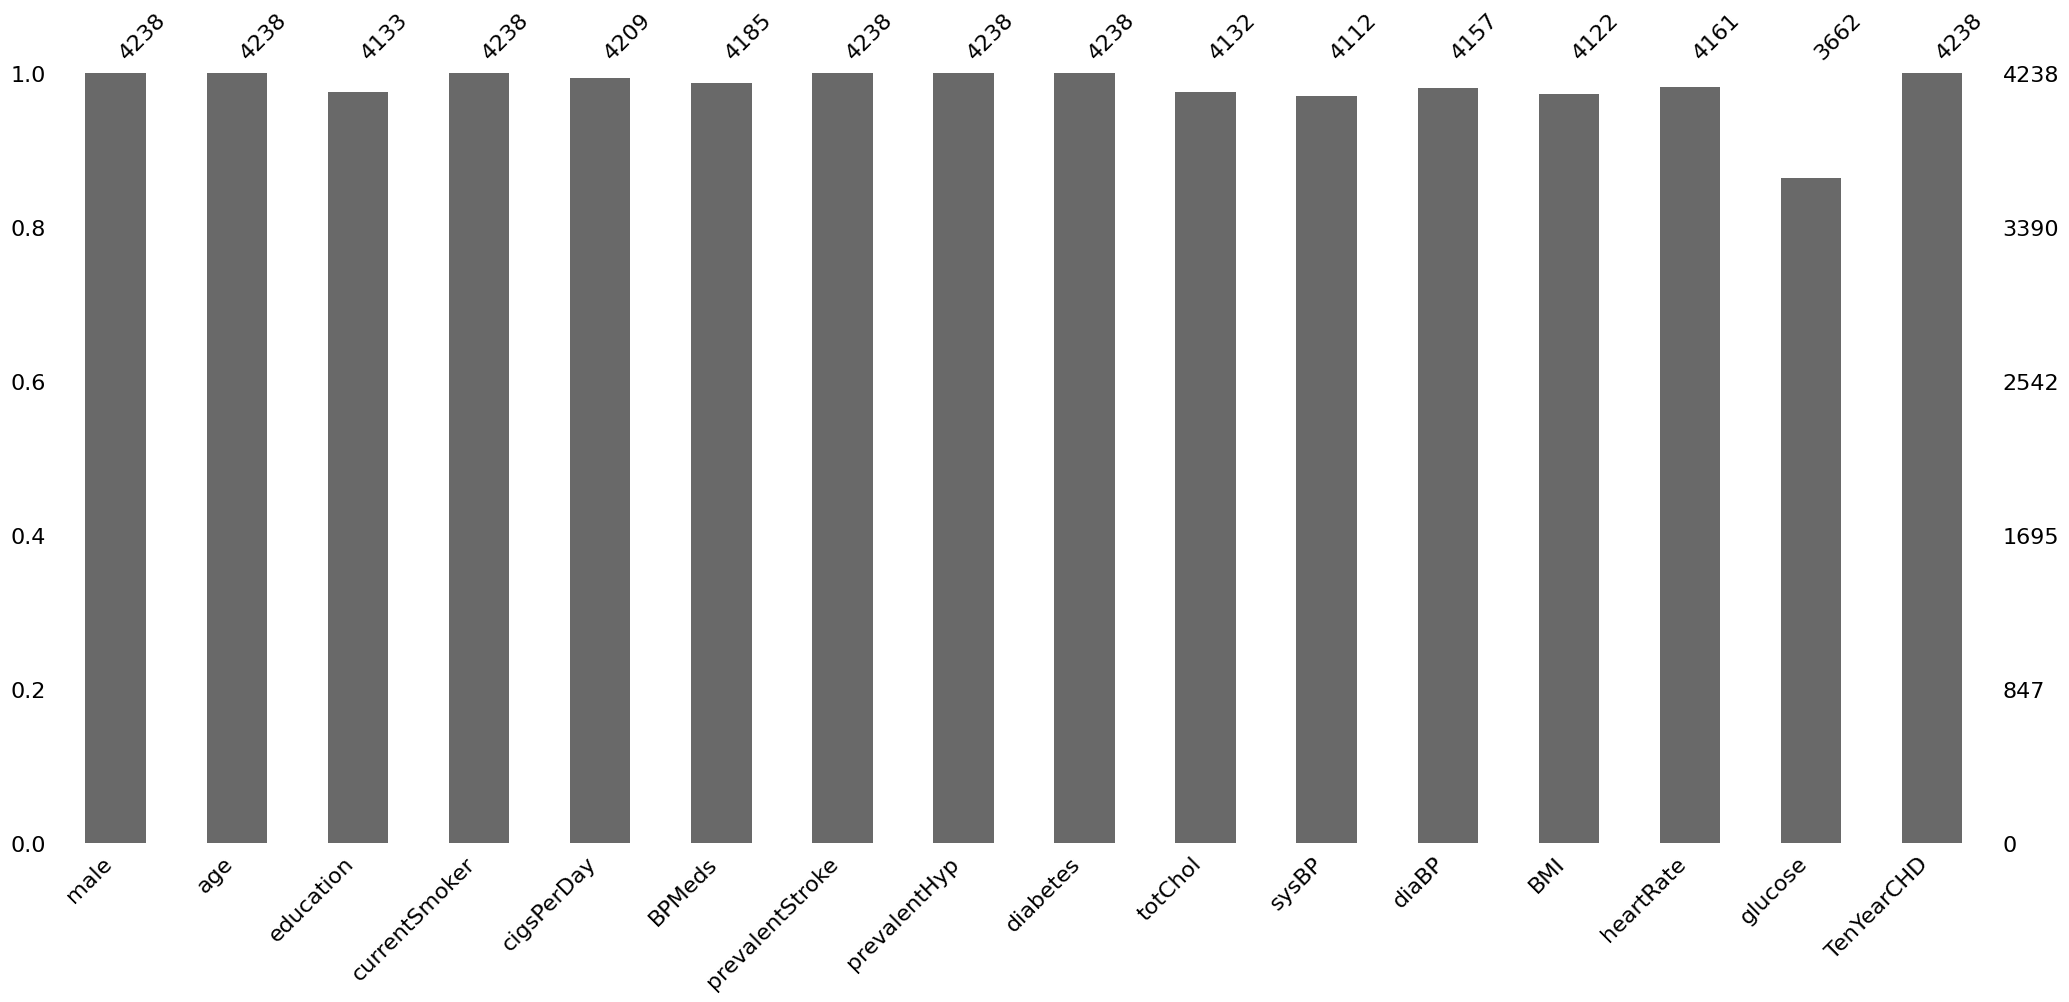

In [171]:
msno.bar(df)
plt.show()

In [172]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_table = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
print(missing_table)


                 Missing Values  Percentage
male                          0    0.000000
age                           0    0.000000
education                   105    2.477584
currentSmoker                 0    0.000000
cigsPerDay                   29    0.684285
BPMeds                       53    1.250590
prevalentStroke               0    0.000000
prevalentHyp                  0    0.000000
diabetes                      0    0.000000
totChol                     106    2.501180
sysBP                       126    2.973101
diaBP                        81    1.911279
BMI                         116    2.737140
heartRate                    77    1.816895
glucose                     576   13.591317
TenYearCHD                    0    0.000000


**Imputation de cigsPerday par la moyenne**

In [173]:
imputer_mean = SimpleImputer(strategy='mean')
df['cigsPerDay_imputed'] = imputer_mean.fit_transform(df[['cigsPerDay']])
df= df.drop(columns=['cigsPerDay'])  

# Vérifier les valeurs manquantes après imputation
missing_values_after = df.isnull().mean()
print("\nMissing Values After Treatment:\n", missing_values_after)


Missing Values After Treatment:
 male                  0.000000
age                   0.000000
education             0.024776
currentSmoker         0.000000
BPMeds                0.012506
prevalentStroke       0.000000
prevalentHyp          0.000000
diabetes              0.000000
totChol               0.025012
sysBP                 0.029731
diaBP                 0.019113
BMI                   0.027371
heartRate             0.018169
glucose               0.135913
TenYearCHD            0.000000
cigsPerDay_imputed    0.000000
dtype: float64


**Imputation des autres variables selon Missing At Random ou not At Random**

**Pour education est Missing not At Random donc on va utiliser iterativeimputer method**

In [174]:
imputer = IterativeImputer(max_iter=10, random_state=0, sample_posterior=True)

df_imputed = pd.DataFrame(imputer.fit_transform(df[['education']])).round().astype(int)
df_imputed.columns = ['education_imputed']
df = df.drop(columns=['education'])  
df = pd.concat([df, df_imputed], axis=1)
df.isnull().mean()

male                  0.000000
age                   0.000000
currentSmoker         0.000000
BPMeds                0.012506
prevalentStroke       0.000000
prevalentHyp          0.000000
diabetes              0.000000
totChol               0.025012
sysBP                 0.029731
diaBP                 0.019113
BMI                   0.027371
heartRate             0.018169
glucose               0.135913
TenYearCHD            0.000000
cigsPerDay_imputed    0.000000
education_imputed     0.000000
dtype: float64

**Les autres sont tous Missing At Random**

In [175]:
imputer = KNNImputer(n_neighbors=7)
df[['totalchol_imputed', 'sysBP_imputed','diaBP_imputed','BMI_imputed','heartRate_imputed','glucose_imputed']] = imputer.fit_transform(df[['totChol', 'sysBP','diaBP','BMI','heartRate','glucose']])
  
df['BPMeds_imputed'] =imputer.fit_transform(df[['BPMeds']]).round().astype(int)
df= df.drop(columns=['BPMeds', 'totChol', 'sysBP','diaBP','BMI','heartRate','glucose'])

df.isnull().mean()

male                  0.0
age                   0.0
currentSmoker         0.0
prevalentStroke       0.0
prevalentHyp          0.0
diabetes              0.0
TenYearCHD            0.0
cigsPerDay_imputed    0.0
education_imputed     0.0
totalchol_imputed     0.0
sysBP_imputed         0.0
diaBP_imputed         0.0
BMI_imputed           0.0
heartRate_imputed     0.0
glucose_imputed       0.0
BPMeds_imputed        0.0
dtype: float64

Toutes les valeurs manquantes sont remplacées 

**Standarisation de l'échelle**

Dans notre dataset il y'a une grande dufference d'echélle entre les différentes variables prenant l'exemple de total cholestérol qui prend des valeurs allant jusqu'au 400 or pour age le maximun qu'il atteiint c'est 80, cette différence d'échelle va affecter notre modéle,d'ou la nécessité de normaliser et standariser nos données

**Données aprés standarisation**

In [176]:
scaler=StandardScaler()
continuous_features = ['age', 'cigsPerDay_imputed', 'BMI_imputed','totalchol_imputed', 'sysBP_imputed','diaBP_imputed','heartRate_imputed', 'glucose_imputed']
df_scaled=scaler.fit_transform(df[continuous_features])
df_transformed=df.copy()
df_transformed[continuous_features]=df_scaled
print(df_transformed)

      male       age  currentSmoker  prevalentStroke  prevalentHyp  diabetes  \
0        1 -1.234951              0                0             0         0   
1        0 -0.418257              0                0             0         0   
2        1 -0.184916              1                0             0         0   
3        0  1.331800              1                0             1         0   
4        0 -0.418257              1                0             0         0   
...    ...       ...            ...              ...           ...       ...   
4233     1  0.048425              1                0             1         0   
4234     1  0.165095              1                0             0         0   
4235     0 -0.184916              1                0             0         0   
4236     0 -0.651598              1                0             0         0   
4237     0  0.281766              0                0             0         0   

      TenYearCHD  cigsPerDay_imputed  e

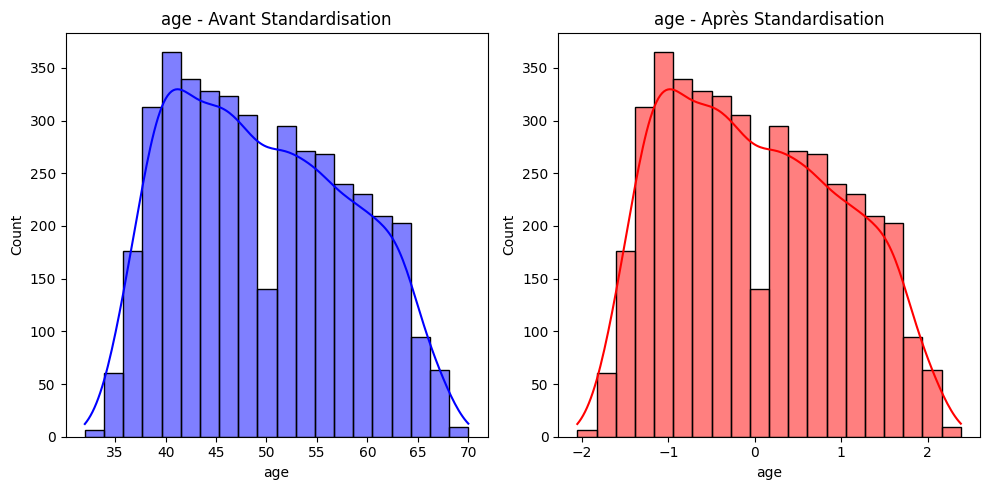

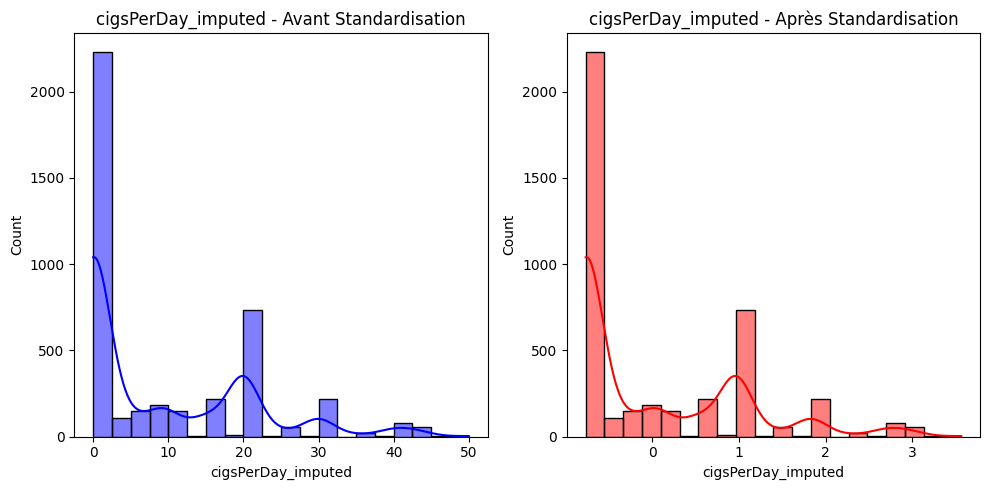

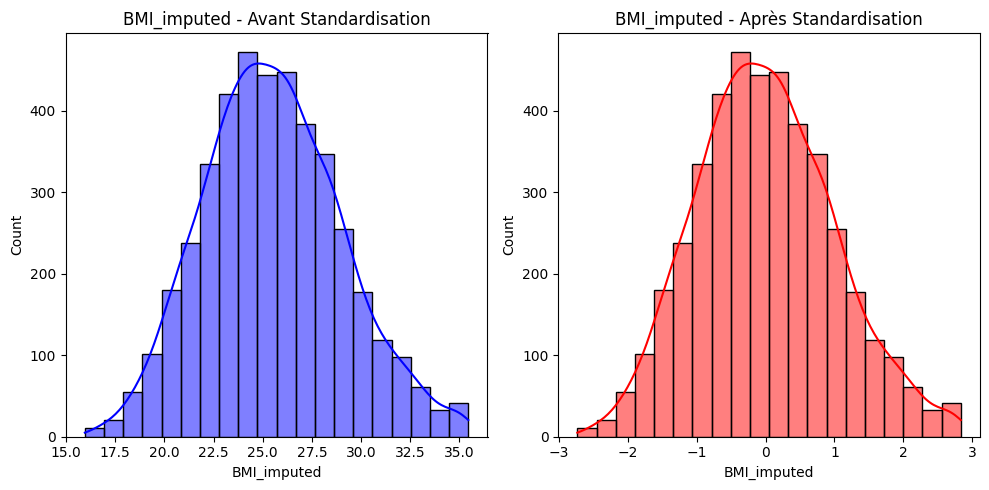

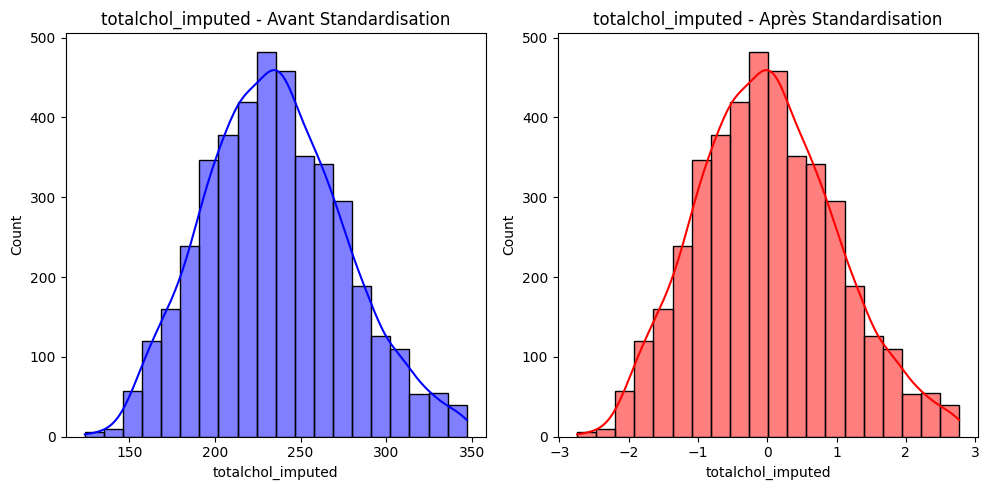

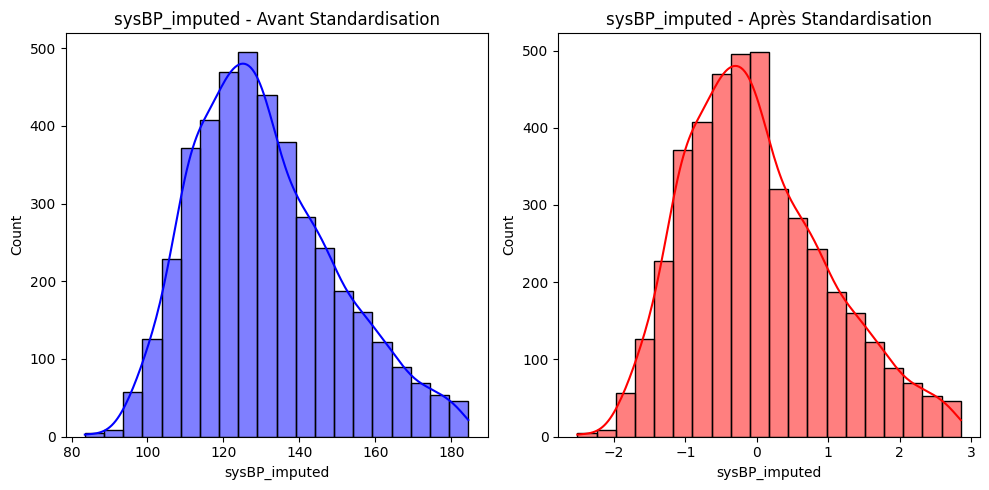

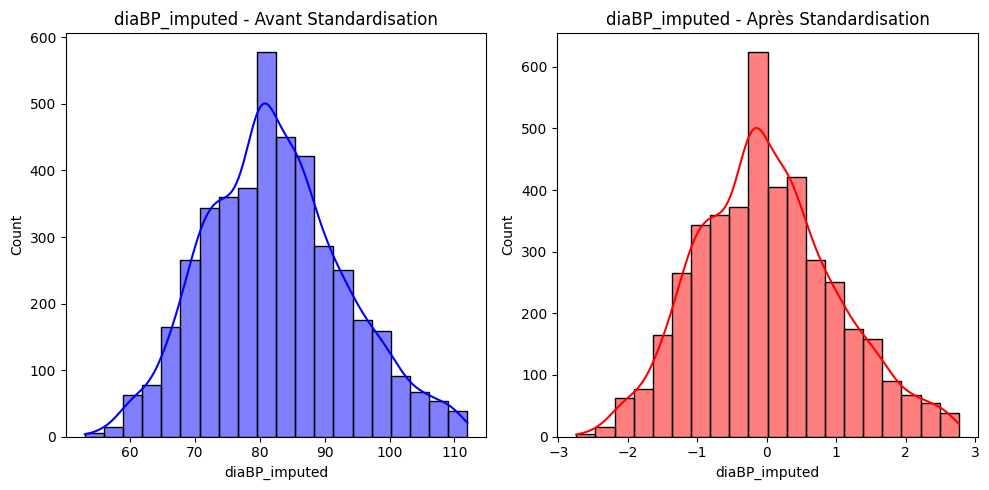

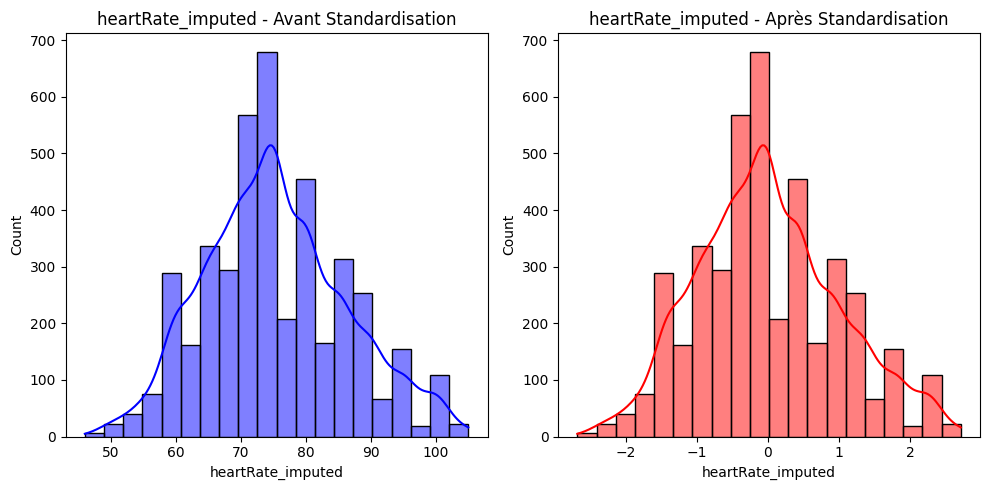

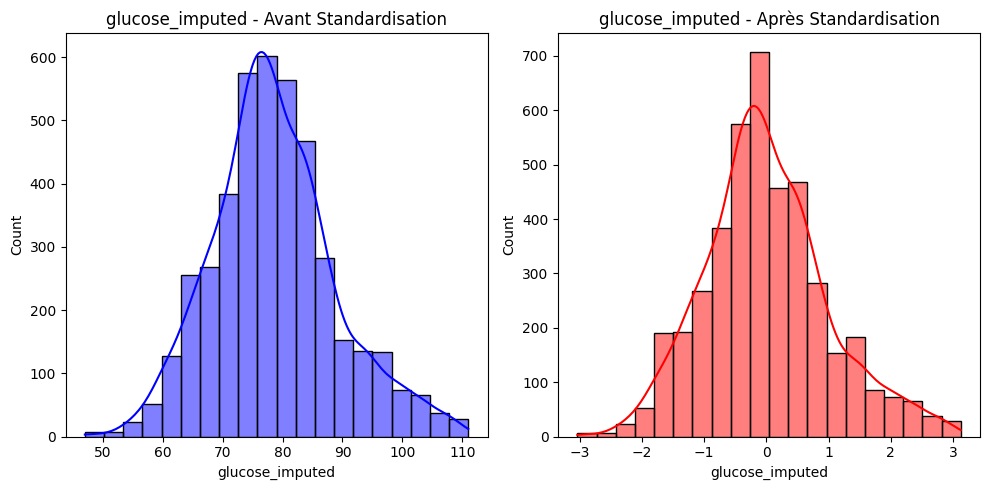

In [177]:
# Visualisation pour chaque variable continue avant et après standardisation
for var in continuous_features:
    plt.figure(figsize=(10, 5))
        #Avant standardisation
    plt.subplot(1, 2, 1)
    sns.histplot(df[var], kde=True, bins=20, color='blue')
    plt.title(f'{var} - Avant Standardisation')

    # Après standardisation
    plt.subplot(1, 2, 2)
    sns.histplot(df_transformed[var], kde=True, bins=20, color='red')
    plt.title(f'{var} - Après Standardisation')

    plt.tight_layout()
    plt.show()

On remarque qu'aprés standarisation les variables varient dans une plage de valeurs moin restreintes entre [-3,3] par rapport aux valeurs qu'ils prennent avant la standarisation

**Analyse univarié**

**Les variables quantitatives**

<Axes: >

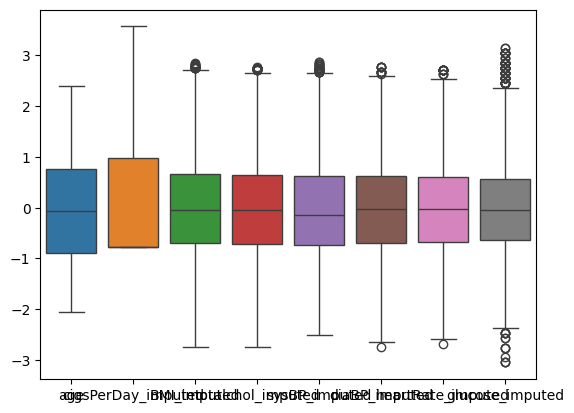

In [178]:
df=df_transformed

Quantitative= ['age', 'cigsPerDay_imputed', 'BMI_imputed','totalchol_imputed', 'sysBP_imputed','diaBP_imputed','heartRate_imputed', 'glucose_imputed']
sns.boxplot(data=df[Quantitative])

**Test de la normalité**

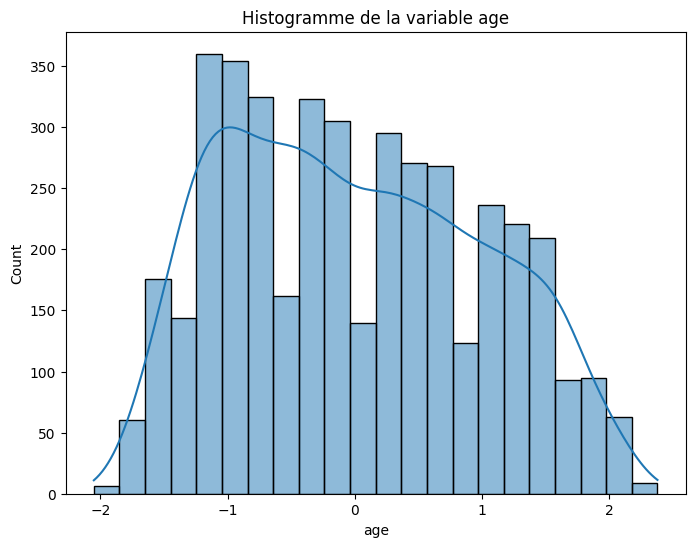

La variable age ne suit pas une loi normale (p-value=1.758889898437696e-205)


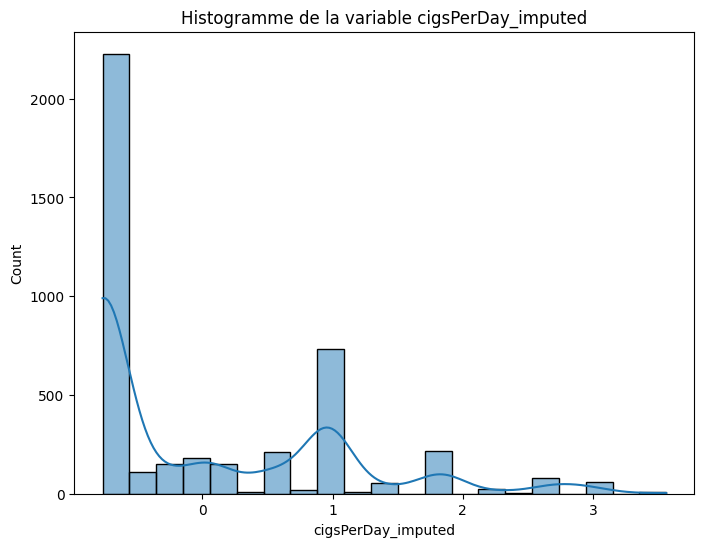

La variable cigsPerDay_imputed ne suit pas une loi normale (p-value=3.369016060030906e-138)


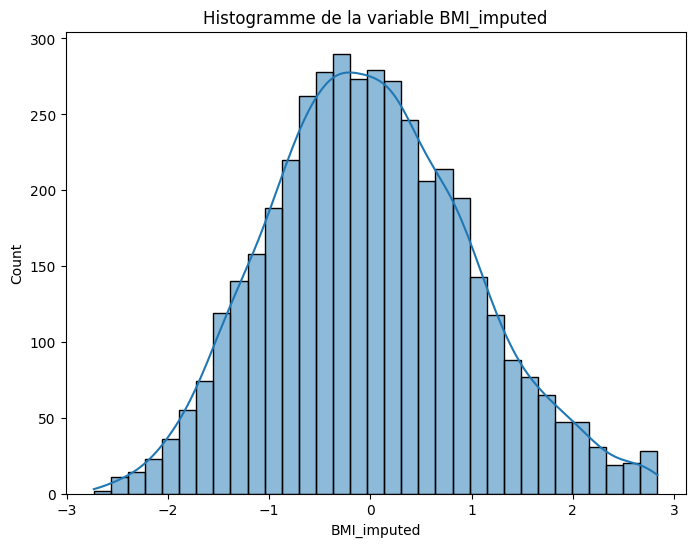

La variable BMI_imputed ne suit pas une loi normale (p-value=1.5589862630995654e-10)


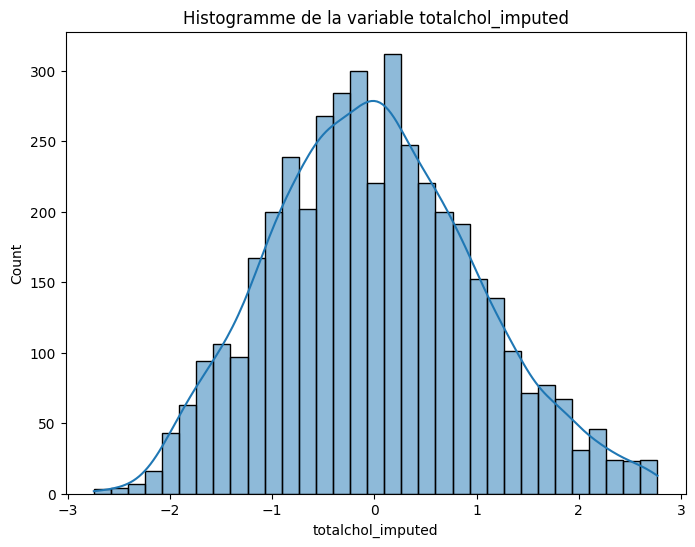

La variable totalchol_imputed ne suit pas une loi normale (p-value=4.952966962963675e-12)


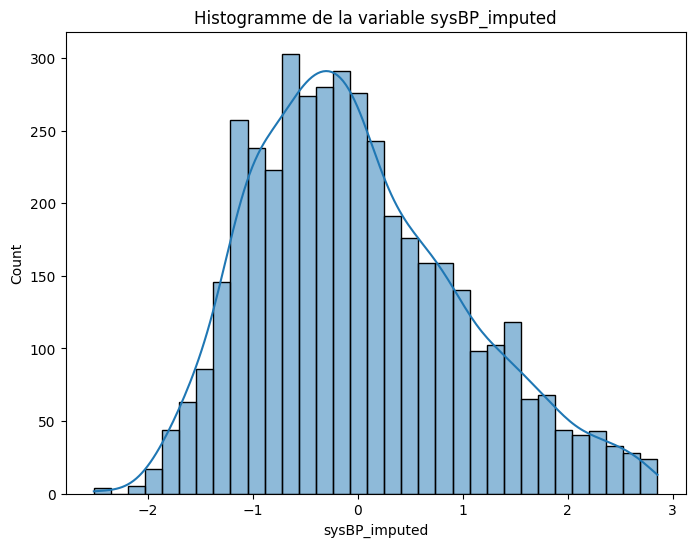

La variable sysBP_imputed ne suit pas une loi normale (p-value=1.618774657064178e-41)


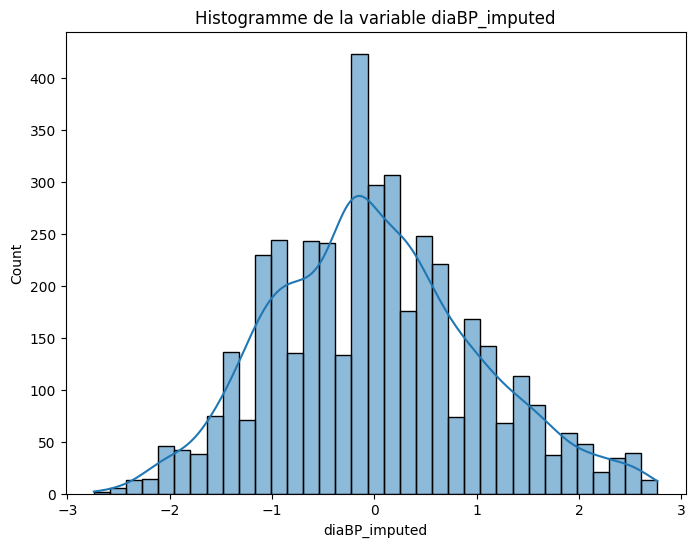

La variable diaBP_imputed ne suit pas une loi normale (p-value=1.5833333658721431e-12)


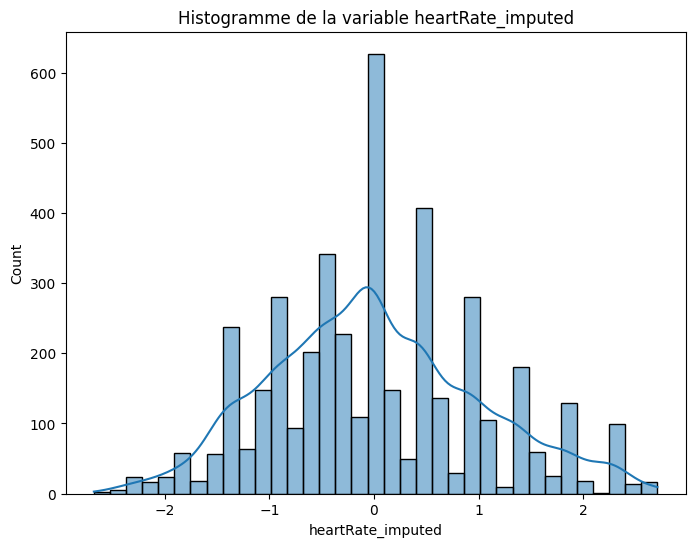

La variable heartRate_imputed ne suit pas une loi normale (p-value=9.436460413666842e-15)


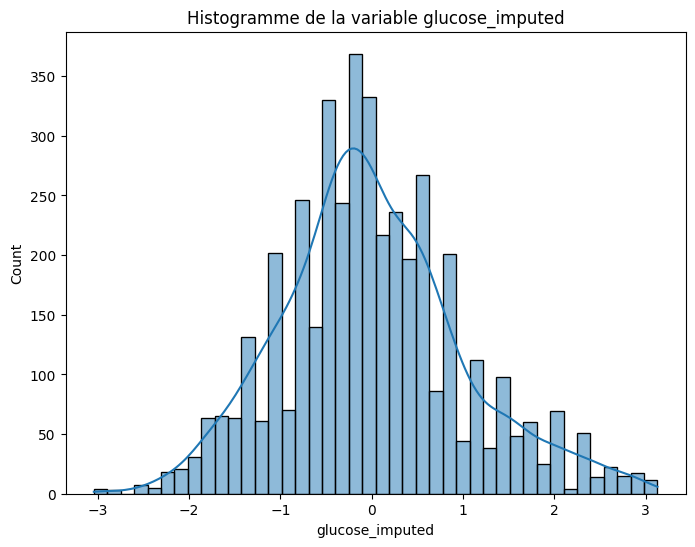

La variable glucose_imputed ne suit pas une loi normale (p-value=9.234655302017662e-24)


In [179]:
# Analyse de la normalité
# Création d'un histogramme et d'un test de normalité pour chaque variable
for column in Quantitative:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f"Histogramme de la variable {column}")
    plt.show()
    statistic, p_value = stats.normaltest(df[column])
    if p_value < 0.05:
        print(f"La variable {column} ne suit pas une loi normale (p-value={p_value})")
    else:
        print(f"La variable {column}  suit une loi normale (p-value={p_value})")    
    

L'ensembles des variables quantitatives ne suivent pas une loi normale 

**Pour les variables qualitatives**

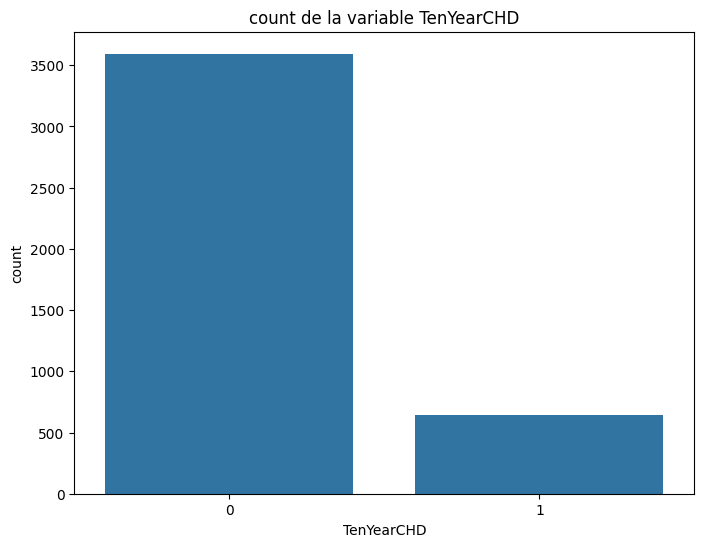

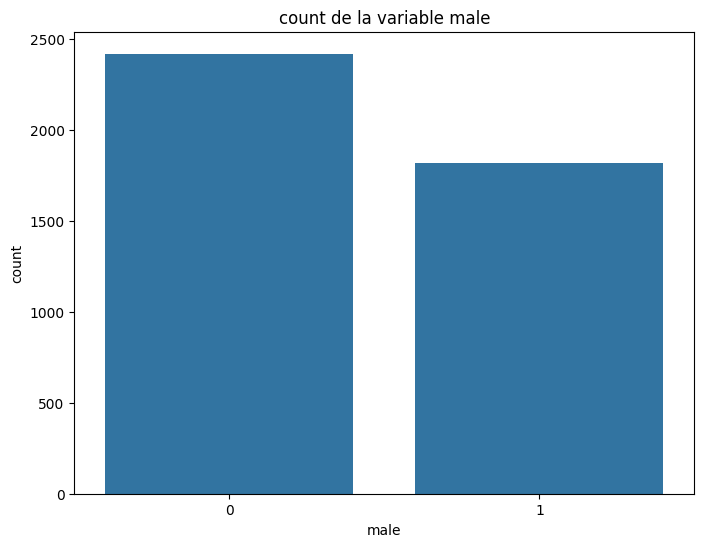

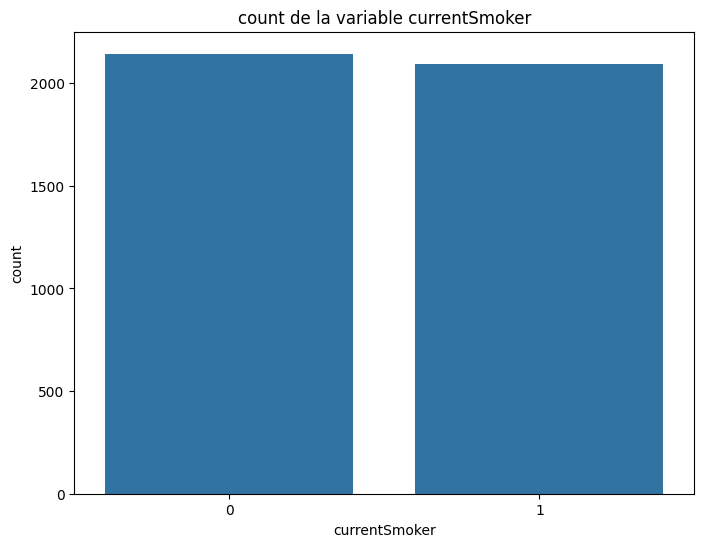

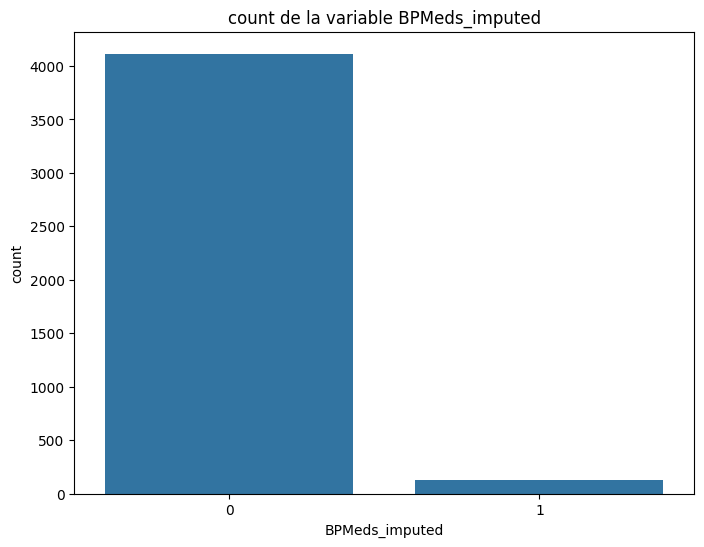

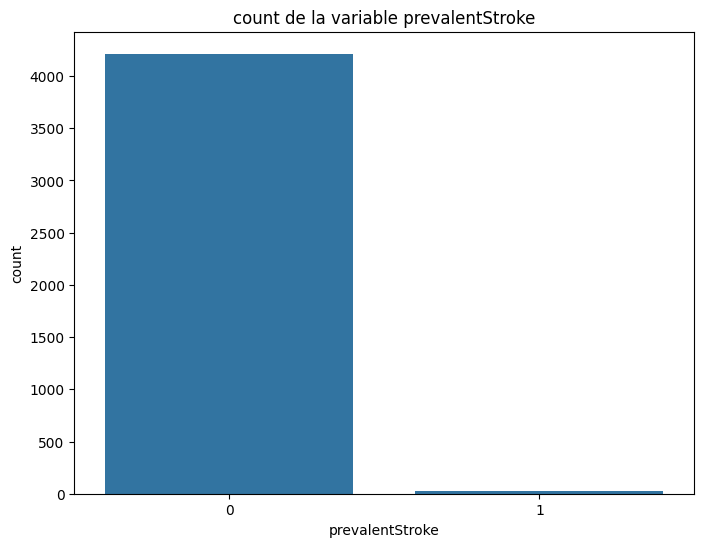

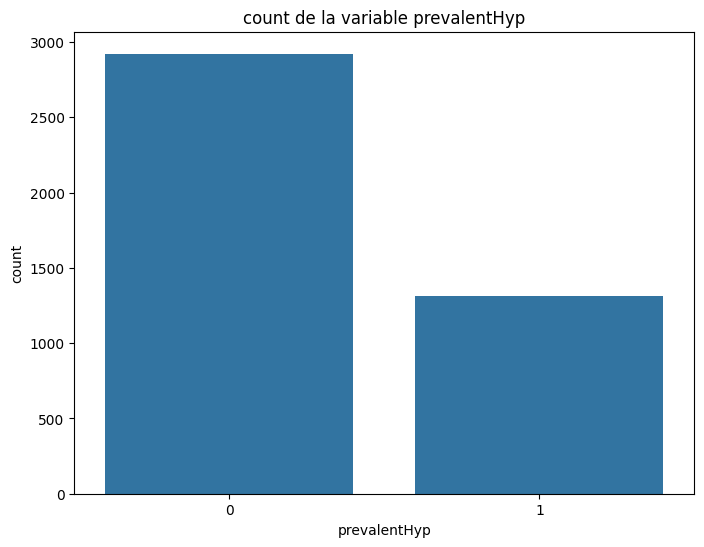

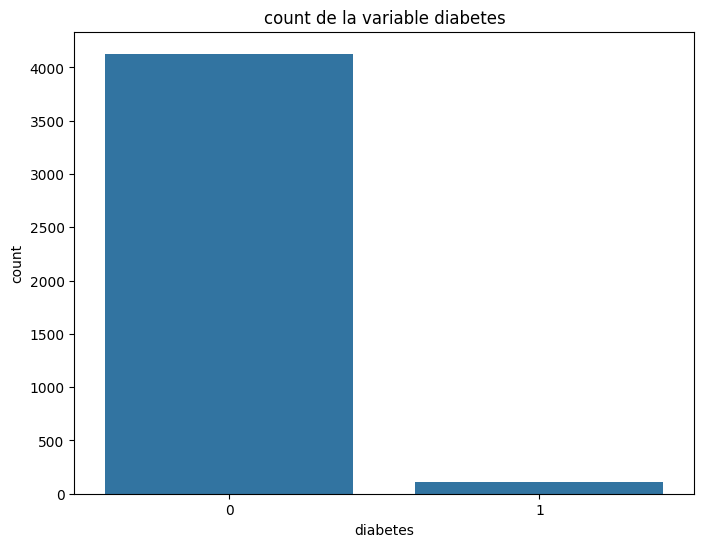

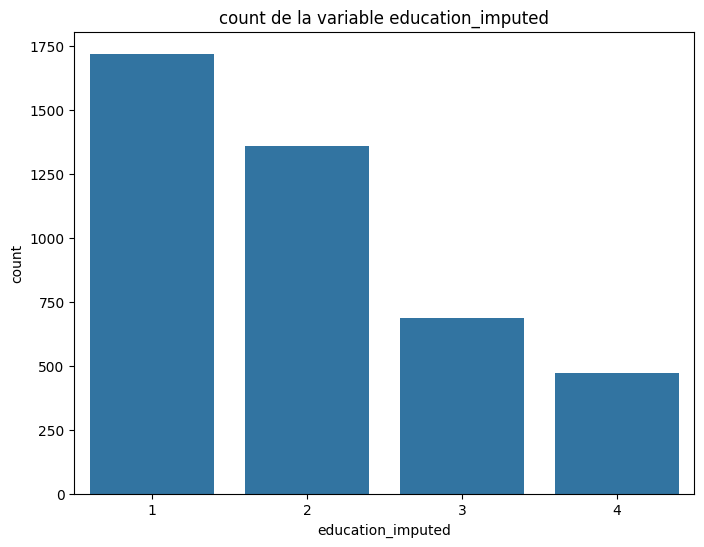

In [180]:
Qualitatifs=['TenYearCHD','male', 'currentSmoker', 'BPMeds_imputed', 'prevalentStroke', 'prevalentHyp', 'diabetes','education_imputed']

for column in Qualitatifs:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=column)
    plt.title(f"count de la variable {column}")
    plt.show()


**Analyse bivariée**

**La distribution des variables en fonction de la variable cible TenYearCHD**

C:\Users\pc\AppData\Local\Temp\ipykernel_19888\2476400318.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TenYearCHD', y=col, data=df, palette='Set2', ax=ax)
C:\Users\pc\AppData\Local\Temp\ipykernel_19888\2476400318.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TenYearCHD', y=col, data=df, palette='Set2', ax=ax)
C:\Users\pc\AppData\Local\Temp\ipykernel_19888\2476400318.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TenYearCHD', y=col, data=df, palette='Set2', ax=ax)
C:\Users\pc\AppData\Local\Temp\ipykernel_19888\24

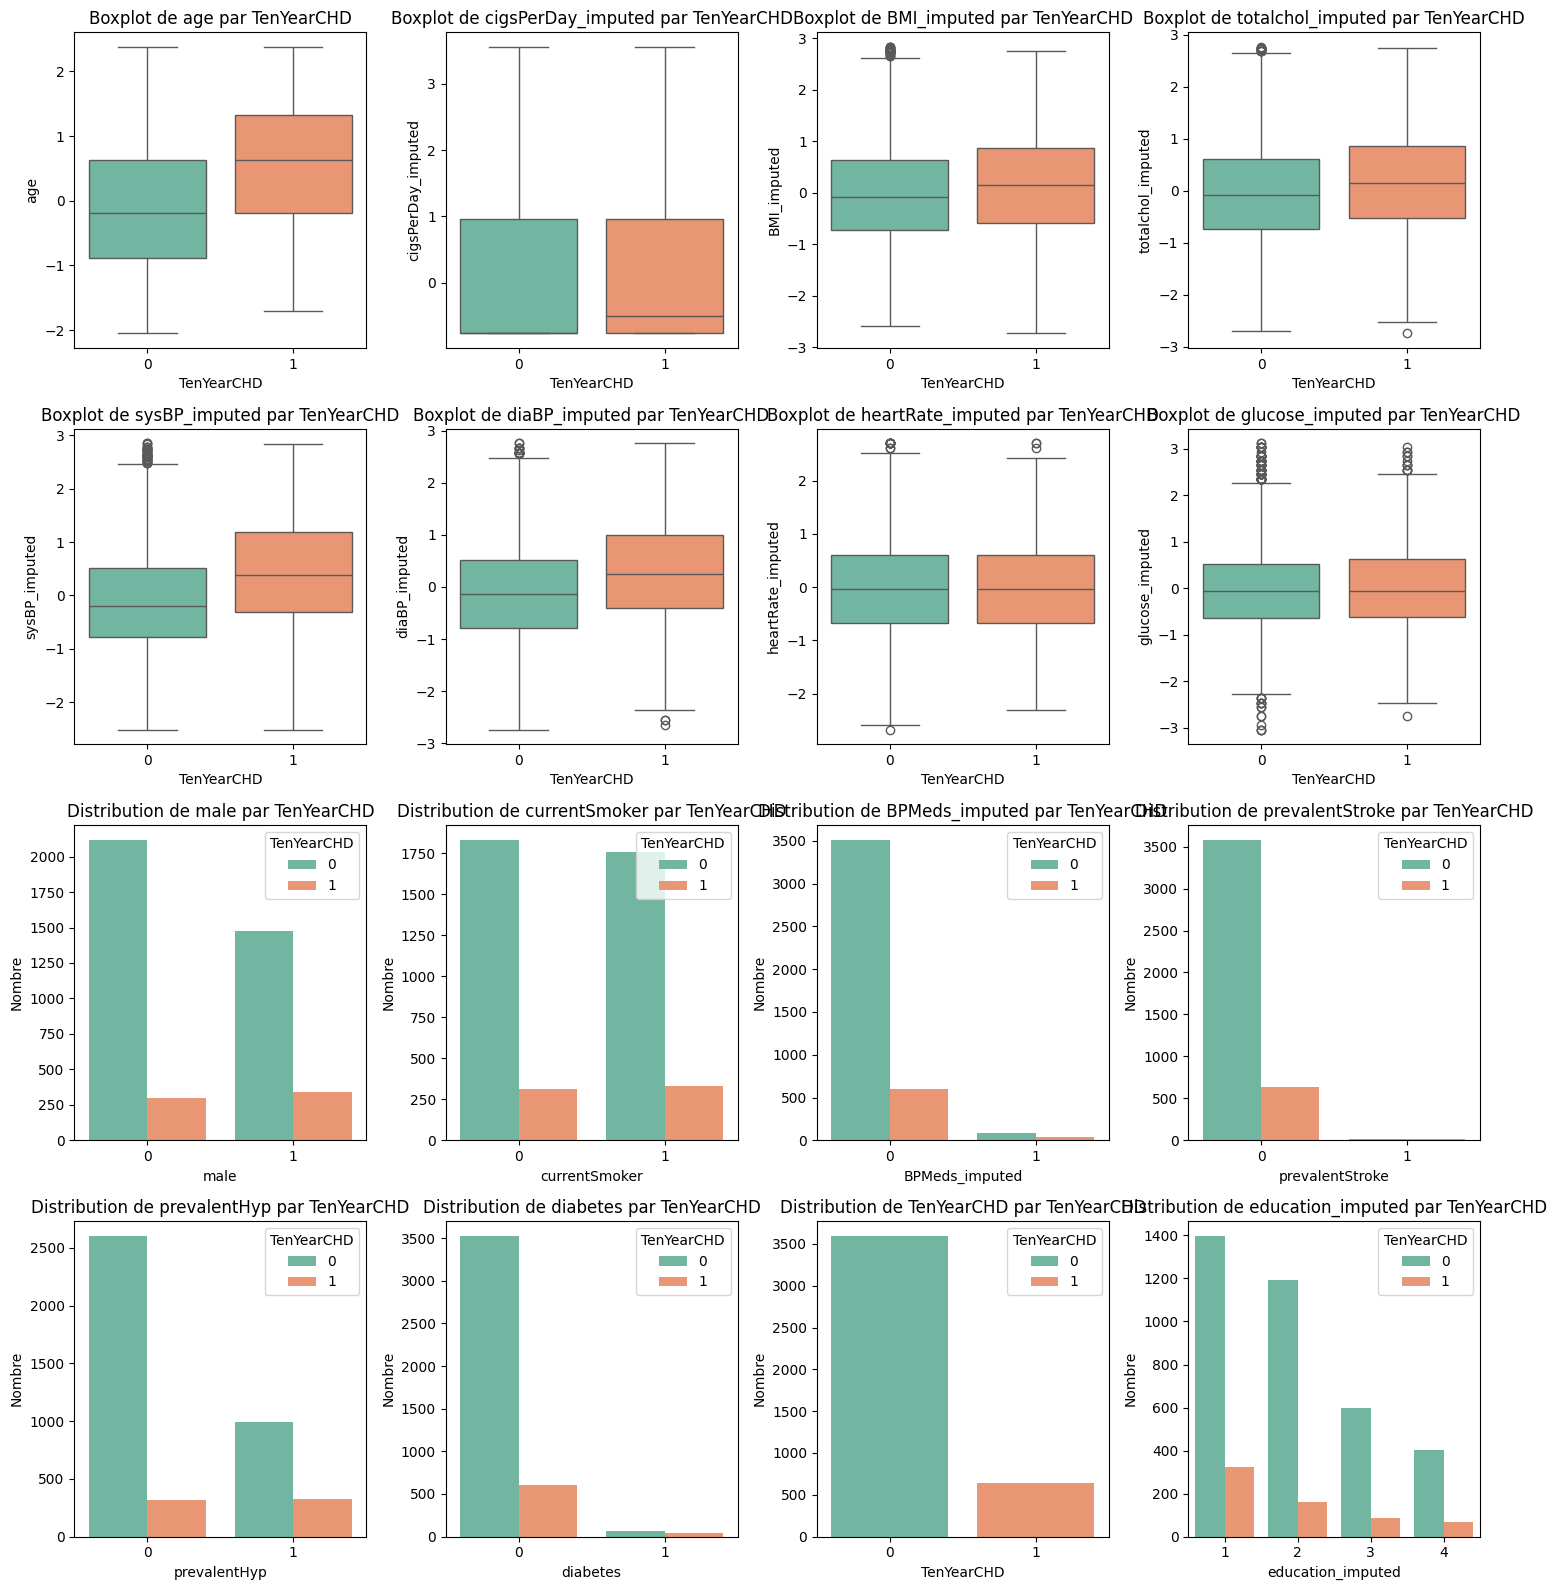

In [181]:
import math
categorical_features = ['male', 'currentSmoker', 'BPMeds_imputed', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD','education_imputed']
continuous_features = ['age', 'cigsPerDay_imputed', 'BMI_imputed','totalchol_imputed', 'sysBP_imputed','diaBP_imputed','heartRate_imputed', 'glucose_imputed']

#on a 16 variables et on va faire que 4 colonnes danc chaque colonne va contenir 4 plots
n_cols = 4
n_rows = 4

# Créer une figure avec des subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))

# Pour les variables continues
for i, col in enumerate(continuous_features):
    ax = axes[i // n_cols, i % n_cols]
    sns.boxplot(x='TenYearCHD', y=col, data=df, palette='Set2', ax=ax)
    ax.set_title(f"Boxplot de {col} par TenYearCHD")
    ax.set_xlabel("TenYearCHD")
    ax.set_ylabel(col)

# Pour les variables catégoriques
for i, col in enumerate(categorical_features):
    ax = axes[(i + len(continuous_features)) // n_cols, (i + len(continuous_features)) % n_cols]
    sns.countplot(x=col, hue='TenYearCHD', data=df, palette='Set2', ax=ax)
    ax.set_title(f"Distribution de {col} par TenYearCHD")
    ax.set_xlabel(col)
    ax.set_ylabel("Nombre")
    ax.legend(title="TenYearCHD", loc='upper right')


plt.tight_layout()
plt.show()


Pour les variables continues on a utilisé des boxplots pour visualiser la distribution de chaque variable en fonction de a variable cible qui est Ten-year-CHD

et pour les variables catégorielles on a utilisé des countplots pour visualiser la distribution de chaque variable en fonction de la variable cible qui est Ten-year-CHD

**Maintenant on va utiliser le test de  Kruskal-Wallis pour voir la liaison de chaque variable quantitatif avec la variable cible qualitatif Tean year CHD**

In [182]:
# Confirmation des liaison avec un test de Kruskal-Wallis pour chaque variable
continuous_features = ['age', 'cigsPerDay_imputed', 'BMI_imputed','totalchol_imputed', 'sysBP_imputed','diaBP_imputed','heartRate_imputed', 'glucose_imputed']

for column in continuous_features:

    _, p_value = stats.kruskal(*[df[column][df['TenYearCHD'] == value] 
                             for value in df['TenYearCHD'].unique()])

    if p_value < 0.05:

        print(f"La variable {column} est significativement différente entre les espèces (p-value={p_value})")
    else:

        print(f"La variable {column} n'est pas significativement différente entre les espèces (p-value={p_value})")



La variable age est significativement différente entre les espèces (p-value=1.1655580312348e-47)
La variable cigsPerDay_imputed est significativement différente entre les espèces (p-value=0.0051005802554736695)
La variable BMI_imputed est significativement différente entre les espèces (p-value=1.304407109306852e-05)
La variable totalchol_imputed est significativement différente entre les espèces (p-value=5.561021825007835e-07)
La variable sysBP_imputed est significativement différente entre les espèces (p-value=2.6173411887364053e-31)
La variable diaBP_imputed est significativement différente entre les espèces (p-value=7.271676654829474e-15)
La variable heartRate_imputed n'est pas significativement différente entre les espèces (p-value=0.3512422685401271)
La variable glucose_imputed n'est pas significativement différente entre les espèces (p-value=0.05853983036548218)


**Mesure de la liaison entre les variables catégorielles et la variable cible**

In [183]:
from scipy.stats import chi2_contingency

Qualitatifs=['male', 'currentSmoker', 'BPMeds_imputed', 'prevalentStroke', 'prevalentHyp', 'diabetes','education_imputed']

for column in Qualitatifs:      
    # Créer un tableau de contingence
    contingency_table = pd.crosstab(df[column], df['TenYearCHD'])
    contingency_table
    # Effectuer le test du chi-carré
    chi2_stat, p_value, dof, expected_freq = chi2_contingency(contingency_table)
    # Afficher les résultats
    print("Statistique du chi-carré :", chi2_stat)
    print("P-valeur :", p_value)

    if p_value < 0.05:

        print(f"on rejette l'hypothèse nulle et on conclut qu'il y a une association entre La variable {column} et la variable cible.(p-value={p_value})")
    else:

        print(f"On peut pas dire qu'il y a une association entre La variable {column} et la variable cible (p-value={p_value})")


Statistique du chi-carré : 32.64296047074444
P-valeur : 1.1073976912877559e-08
on rejette l'hypothèse nulle et on conclut qu'il y a une association entre La variable male et la variable cible.(p-value=1.1073976912877559e-08)
Statistique du chi-carré : 1.497705652757576
P-valeur : 0.2210247224594497
On peut pas dire qu'il y a une association entre La variable currentSmoker et la variable cible (p-value=0.2210247224594497)
Statistique du chi-carré : 30.236779817102494
P-valeur : 3.82388802600957e-08
on rejette l'hypothèse nulle et on conclut qu'il y a une association entre La variable BPMeds_imputed et la variable cible.(p-value=3.82388802600957e-08)
Statistique du chi-carré : 14.020762729079046
P-valeur : 0.00018080313034275284
on rejette l'hypothèse nulle et on conclut qu'il y a une association entre La variable prevalentStroke et la variable cible.(p-value=0.00018080313034275284)
Statistique du chi-carré : 132.61099703660688
P-valeur : 1.0998229381834025e-30
on rejette l'hypothèse nul

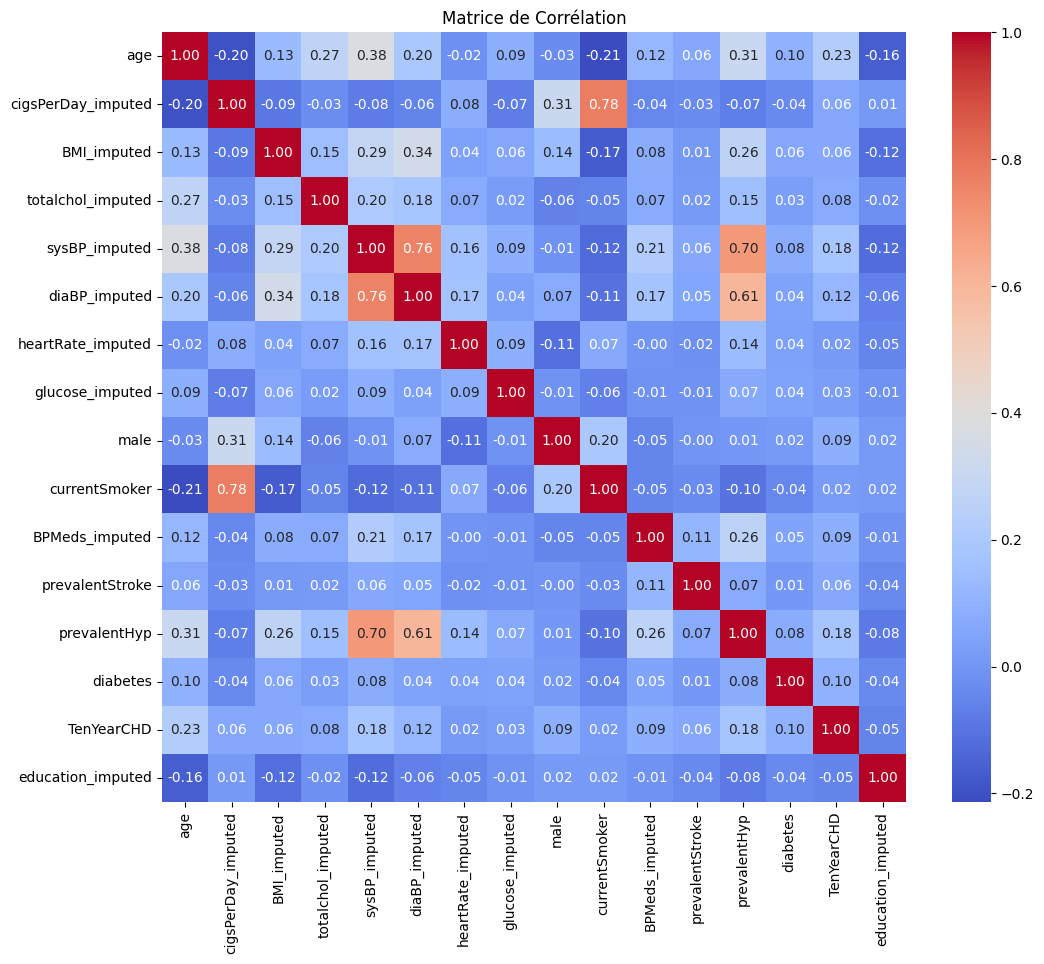

In [184]:
all_features = continuous_features + categorical_features 
df = pd.DataFrame(df, columns=all_features)
# Calculer la matrice de corrélation
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matrice de Corrélation")
plt.show()

Pour la Matrice de corrélation 
On remarque une forte corrélation entre la variable Current-Smoker et Cigs-Per-Day ,donc on peut dire qu'il y'a une redondance d'information et on peut qu'une seule d'entre eux pour expliquer notre modéle.

Le meme cas pour les deux variables Prevelant-Hyp et Sys-BP

**Analyse multivariée**

**Application de la PCA**

In [185]:
# Séparation des données en variables explicatives (X) et variable qualitative (Y)
from sklearn.decomposition import PCA

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
pca = PCA()
X_pca=pca.fit_transform(X)


**Représentation de la variabilité expliquée par chaque axe**

In [186]:
# Analyse des valeurs propres
comp = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(15)], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum.var.expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée",
               "% cum.var.expliquée"]
            )

comp

Dimension  Valeur propre  % variance expliquée  % cum.var.expliquée
0       Dim1       2.446892                  27.0                 27.0
1       Dim2       1.297449                  15.0                 42.0
2       Dim3       1.038225                  12.0                 54.0
3       Dim4       0.987656                  11.0                 65.0
4       Dim5       0.881740                  10.0                 75.0
5       Dim6       0.834390                   9.0                 84.0
6       Dim7       0.643115                   7.0                 91.0
7       Dim8       0.232294                   3.0                 94.0
8       Dim9       0.184131                   2.0                 96.0
9      Dim10       0.118243                   1.0                 97.0
10     Dim11       0.096948                   1.0                 98.0
11     Dim12       0.082045                   1.0                 99.0
12     Dim13       0.026289                   0.0                100.0
13     Dim14       0.024192                   0.0                100.0
14     Dim15       0.005736                   0.0                100.0

**Intérprétation**

On remarque que la premiere dimension n'explique que 27% de la variabilité totale suivi par la deuxieme dimension qui explique 15% de la variabilité totale,aprés la 3éme dimension qui explique 12% de la variabilité totale,...

Pour expliquer au moins 90% de la variabilité totale de nos données on aura besoin de 6 dimensions qui vont expliquer 84% de la variabilité totale 

Ainsi on remarque pour les 3 dernieres dimensions qu'ils ne contribuent pas a l'explication de la variabilité de nos données.

C:\Users\pc\AppData\Local\Temp\ipykernel_19888\1891720211.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g_comp = sns.barplot(x = "Dimension",
C:\Users\pc\AppData\Local\Temp\ipykernel_19888\1891720211.py:2: UserWarning: 
The palette list has fewer values (1) than needed (15) and will cycle, which may produce an uninterpretable plot.
  g_comp = sns.barplot(x = "Dimension",


Text(3.25, 26, '25%')

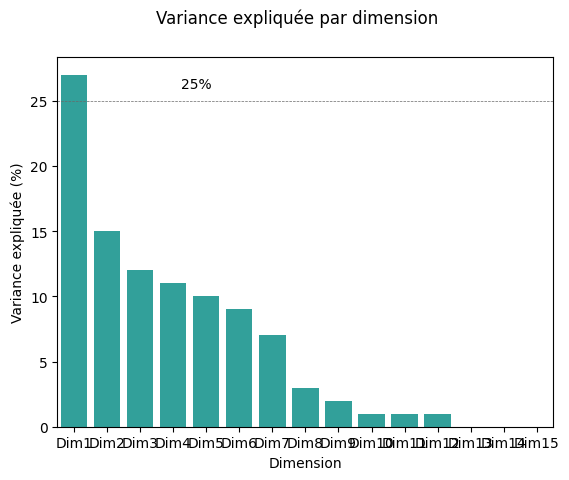

In [187]:
#Scree plot pour choisir le nombre de composantes principales
g_comp = sns.barplot(x = "Dimension", 
                y = "% variance expliquée",
                palette = ["lightseagreen"],
                data = comp)
g_comp.set(ylabel = "Variance expliquée (%)")
g_comp.figure.suptitle("Variance expliquée par dimension")
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--")
plt.text(3.25, 26, "25%")

**Model:LogisticRegression**

**Feature Selection**

In [188]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm

**Avant d'appliquer Feature selection,on a remarqué dans les premiéres étapes qu'on a une base de données déséquilibrées et si on la laisse comme ça le modéle va etre affecté par ce déséquilibre et va prédire plus la classe majoritaire pour cette raison,on va recourir un la méthode smote qui permet un sur-échantillonage de la classe minoritaire**

In [189]:
# Séparer X et y
X = df.drop(columns=['TenYearCHD'])
y = df['TenYearCHD']

# équilibrer les classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Entraîner sur les données équilibrées
clf = LogisticRegression(solver='liblinear', max_iter=1000)
sfs = SFS(clf, k_features='best', forward=True, floating=False, scoring='roc_auc', cv=5)
sfs = sfs.fit(X_resampled, y_resampled)

# Afficher les résultats
print("Forward Selection: \nMeilleures caractéristiques:", list(X.columns[list(sfs.k_feature_idx_)]),"\nMeilleur score:", sfs.k_score_)


C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
C:\Users\pc\AppData\Local\Packages\PythonSoftwareFoundation.Pyth

Forward Selection: 
Meilleures caractéristiques: ['age', 'cigsPerDay_imputed', 'sysBP_imputed', 'heartRate_imputed', 'currentSmoker', 'education_imputed'] 
Meilleur score: 0.7177798992277553


**Interprétation du modéle**

On va faire un sur-echantillonage pour équilibrer les deux classes

In [190]:

X = df.drop(columns=['TenYearCHD'])  
y = df['TenYearCHD']

smote=SMOTE(sampling_strategy='minority') 
x,y=smote.fit_resample(X,y)
y.value_counts()

TenYearCHD
0    3594
1    3594
Name: count, dtype: int64

In [191]:
x_new=x[['age', 'cigsPerDay_imputed', 'sysBP_imputed', 'heartRate_imputed', 'currentSmoker', 'education_imputed']]

X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size=0.3, random_state=42)

# Créer et ajuster le modèle de régression logistique
model = sm.Logit(y_train, X_train)
result = model.fit()

# Afficher le résumé du modèle
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.610214
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             TenYearCHD   No. Observations:                 5031
Model:                          Logit   Df Residuals:                     5025
Method:                           MLE   Df Model:                            5
Date:                Sun, 01 Dec 2024   Pseudo R-squ.:                  0.1196
Time:                        23:08:24   Log-Likelihood:                -3070.0
converged:                       True   LL-Null:                       -3487.2
Covariance Type:            nonrobust   LLR p-value:                4.247e-178
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
age                    0.6807      0.036     19.136      0.000       0.611       0.750
cigsP

Aprés la feature selection on s'est basée sur 6 vaiables pour expliquer notre modéle,On remarque les 6 variables ont des P-value inférieur a 0.05 donc leurs coefficients sont statistiquement non nuls et sont statistiquement significatifS

**Evaluation du modele a partir des métriques**

Accuracy: 0.65
Rapport de classification:
Matrice de confusion:
              precision    recall  f1-score   support

           0       0.65      0.67      0.66      1090
           1       0.65      0.64      0.64      1067

    accuracy                           0.65      2157
   macro avg       0.65      0.65      0.65      2157
weighted avg       0.65      0.65      0.65      2157



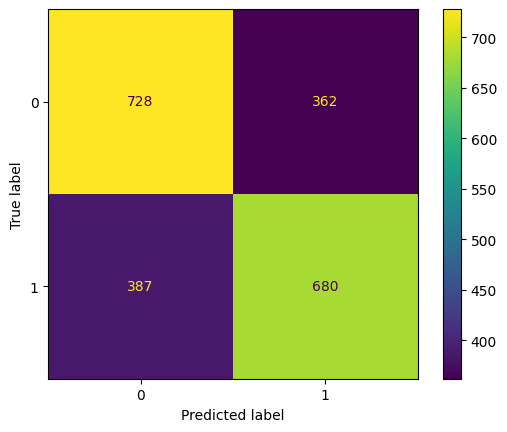

In [192]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Prédictions sur l'ensemble de test
y_pred = result.predict(X_test)  # Prédictions des probabilités
y_pred_class = (y_pred > 0.5).astype(int)  # Conversion des probabilités en classes (0 ou 1)



cm1 = confusion_matrix(y_test, y_pred_class)
ConfusionMatrixDisplay(cm1).plot()



# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred_class)
class_report = classification_report(y_test, y_pred_class)

# Affichage des résultats
print(f"Accuracy: {accuracy:.2f}")
print("Rapport de classification:")
print("Matrice de confusion:")
print(class_report)


**Classe1:** La personne est prédite malade d'ici 10 ans avec CHD

**Classe0:** La personne n'est pas prédite malade d'ici 10 ans avec CHD

**Accuracy=0.65** Donc le modéle a prédit Correctement 65% des données,c'est une faible valeur mais dans notre contexte on voulait prédire les personnes qui sont malades pour des raisons de prédiction ,raison pourlaquelle on va évaluer la performance de notre modéle en se basant sur sa préediction pour chaque classe 0 et 1 et on va utiliser les autres métriques: Précision de chaque classe,Recall,Sensitivity

**Précision pour la classe 0:** Sur toutes les fois où le modèle a prédit que la personne n'est pas malade, 65% étaient correctes,ont été vraiment pas malades.

**Précision pour la classe 1:** Sur toutes les fois où le modèle a prédit que la personne est malade, 64% étaient correctes,ont été vraiment malades.


**Remarque:** On remarque d'aprés les précisions notre modéle a prédit d'une maniere équilibrée les deux classes et c'est grace au sur-échantillonage qu'on a fait

**Puisque la prédiction de la classe 1 nous importe,on va voir Recall pour la classe 1**

**Recall (classe 1)=0.64:** Donc sur toutes les personnes malades qui vont avoir CHD d'ici 10 ans qu'on a vraiment le modéle n'a capté que 64%



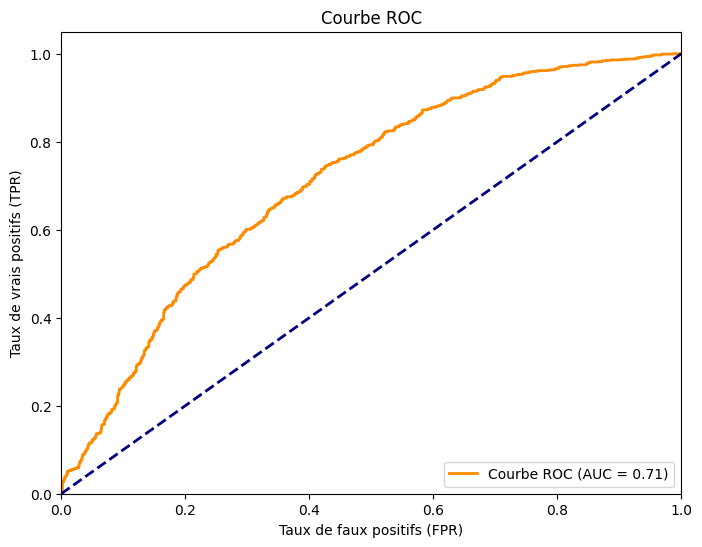

AUC: 0.7103471105646457


In [193]:
from sklearn.metrics import roc_curve, auc

# Calcul des taux de vrais positifs (TPR) et de faux positifs (FPR)
y_pred_proba = result.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calcul de l'AUC
roc_auc = auc(fpr, tpr)

# Affichage de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Courbe ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.show()

# Affichage de l'AUC
print(f"AUC: {roc_auc}")

Puisque le modéle de régression logistique n'a pas donné d bonne performance vu que la régression logistique effectue une classification linéaire,il se peut que nos données ne peuvent pas etre séparés linéairement,raison pour laquelle on va recourir a un autre modéle non linéaire qui est Random Forest et on va évaluer sa performance.

Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      1090
           1       0.83      0.83      0.83      1067

    accuracy                           0.83      2157
   macro avg       0.83      0.83      0.83      2157
weighted avg       0.83      0.83      0.83      2157

Confusion Matrix:
[[907 183]
 [180 887]]
ROC-AUC Score: 0.91


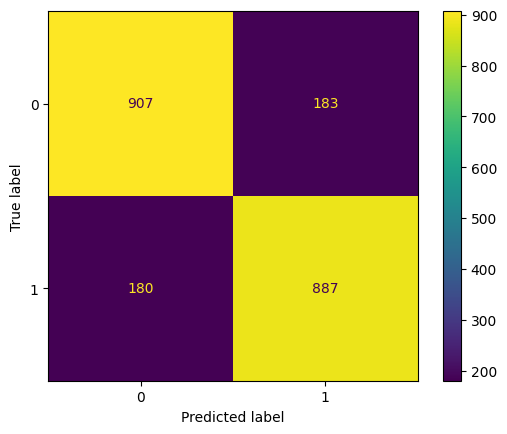

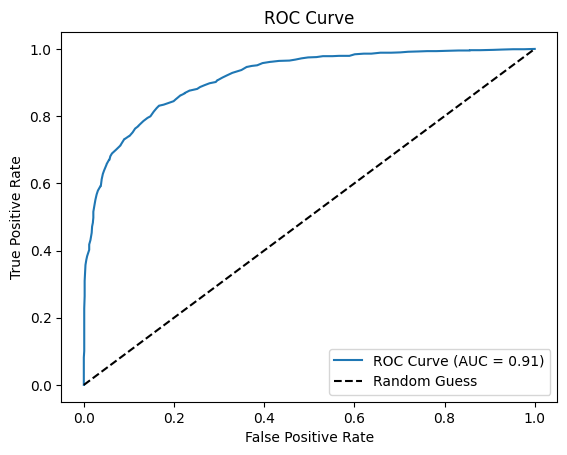

In [194]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


#le modèle Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100) 
rf_model.fit(X_train, y_train)

#Prédire sur l'ensemble de test
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1] 
y_pred_class=(y_pred > 0.5).astype(int)

# Évaluation des performances
cm1 = confusion_matrix(y_test, y_pred_class)
ConfusionMatrixDisplay(cm1).plot()

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred_class)
class_report = classification_report(y_test, y_pred_class)

# Affichage des résultats
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))


#Matrice de confusion
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

#ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()

**Classe1:** La personne est prédite malade d'ici 10 ans avec CHD

**Classe0:** La personne n'est pas prédite malade d'ici 10 ans avec CHD

**Accuracy=0.84** Donc le modéle a prédit Correctement 84% des données,c'est une bonne valeur et performance mais dans notre contexte on voulait prédire les personnes qui sont malades pour des raisons de prédiction ,raison pourlaquelle on va évaluer la performance de notre modéle en se basant sur sa préediction pour chaque classe 0 et 1 et on va utiliser les autres métriques: Précision de chaque classe,Recall

**Précision pour la classe 0= 0.84:** Sur toutes les fois où le modèle a prédit que la personne n'est pas malade, 84% étaient correctes,ont été vraiment pas malades.

**Précision pour la classe 1= 0.83:** Sur toutes les fois où le modèle a prédit que la personne est malade, 83% étaient correctes,ont été vraiment malades.


**Remarque:** On remarque d'aprés les précisions notre modéle a prédit d'une maniere équilibrée les deux classes et c'est grace au sur-échantillonage qu'on a fait

**Puisque la prédiction de la classe 1 nous importe,on va voir Recall pour la classe 1**

**Recall (classe 1)= 0.84 :** Donc sur toutes les personnes malades qui vont avoir CHD d'ici 10 ans qu'on a vraiment le modéle a pu capté 84%


Donc,on remarque que le modéle a bien prédit et a fait de bonnes performances en se comparant avec la régression logistique



**Conclusion:** Le modéle a donnée de bonnes performances soit au niveau de l'accuracy,précision pour les deux classes,Recall pour l'algorithme de Random-Forest,ainsi ce dernier est bien adapté pour cette classificationet a surpassé la régression logistique, notamment en termes d'accuracy,précisionpour les deux classeset le recall.
